# 2.1.1 Начало работы с временными рядами

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Зарплата сотрудников некоторой фирмы в зависимости от времени.

In [2]:
ts_wage = pd.read_csv('data/monthly_wage.csv', sep=';')

ts_wage.head()

Month  Real wage
0  1993-01     100.00
1  1993-02      99.04
2  1993-03     101.77
3  1993-04     110.05
4  1993-05     115.47

In [3]:
ts_wage.dtypes

Month         object
Real wage    float64
dtype: object

In [4]:
ts_wage = pd.read_csv(
    'data/monthly_wage.csv',
    sep=';',
    decimal='.',
    parse_dates=True,
    index_col='Month'
    )

ts_wage.head()

Real wage
Month                
1993-01-01     100.00
1993-02-01      99.04
1993-03-01     101.77
1993-04-01     110.05
1993-05-01     115.47

In [5]:
ts_wage.index.names=['Timestamp']
ts_wage = ts_wage.sort_index()

In [6]:
ts_wage.head()

Real wage
Timestamp            
1993-01-01     100.00
1993-02-01      99.04
1993-03-01     101.77
1993-04-01     110.05
1993-05-01     115.47

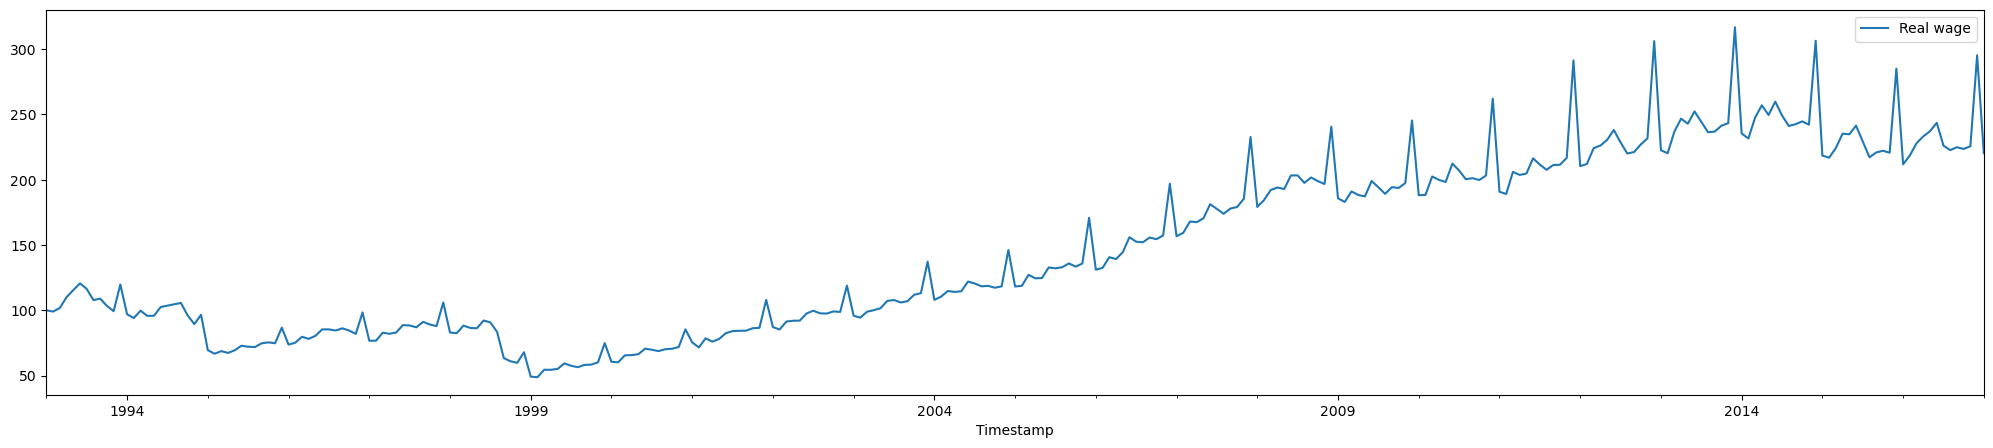

In [7]:
ts_wage.plot(figsize = (25,5));

## Компоненты временного ряда

* Тренд (trend) - плавное долгосрочное изменение значений ряда
* Сезонность (seasonality) - сезонные колебания ряда
* Шум (noise) - шумовая/случайная компонента ряда

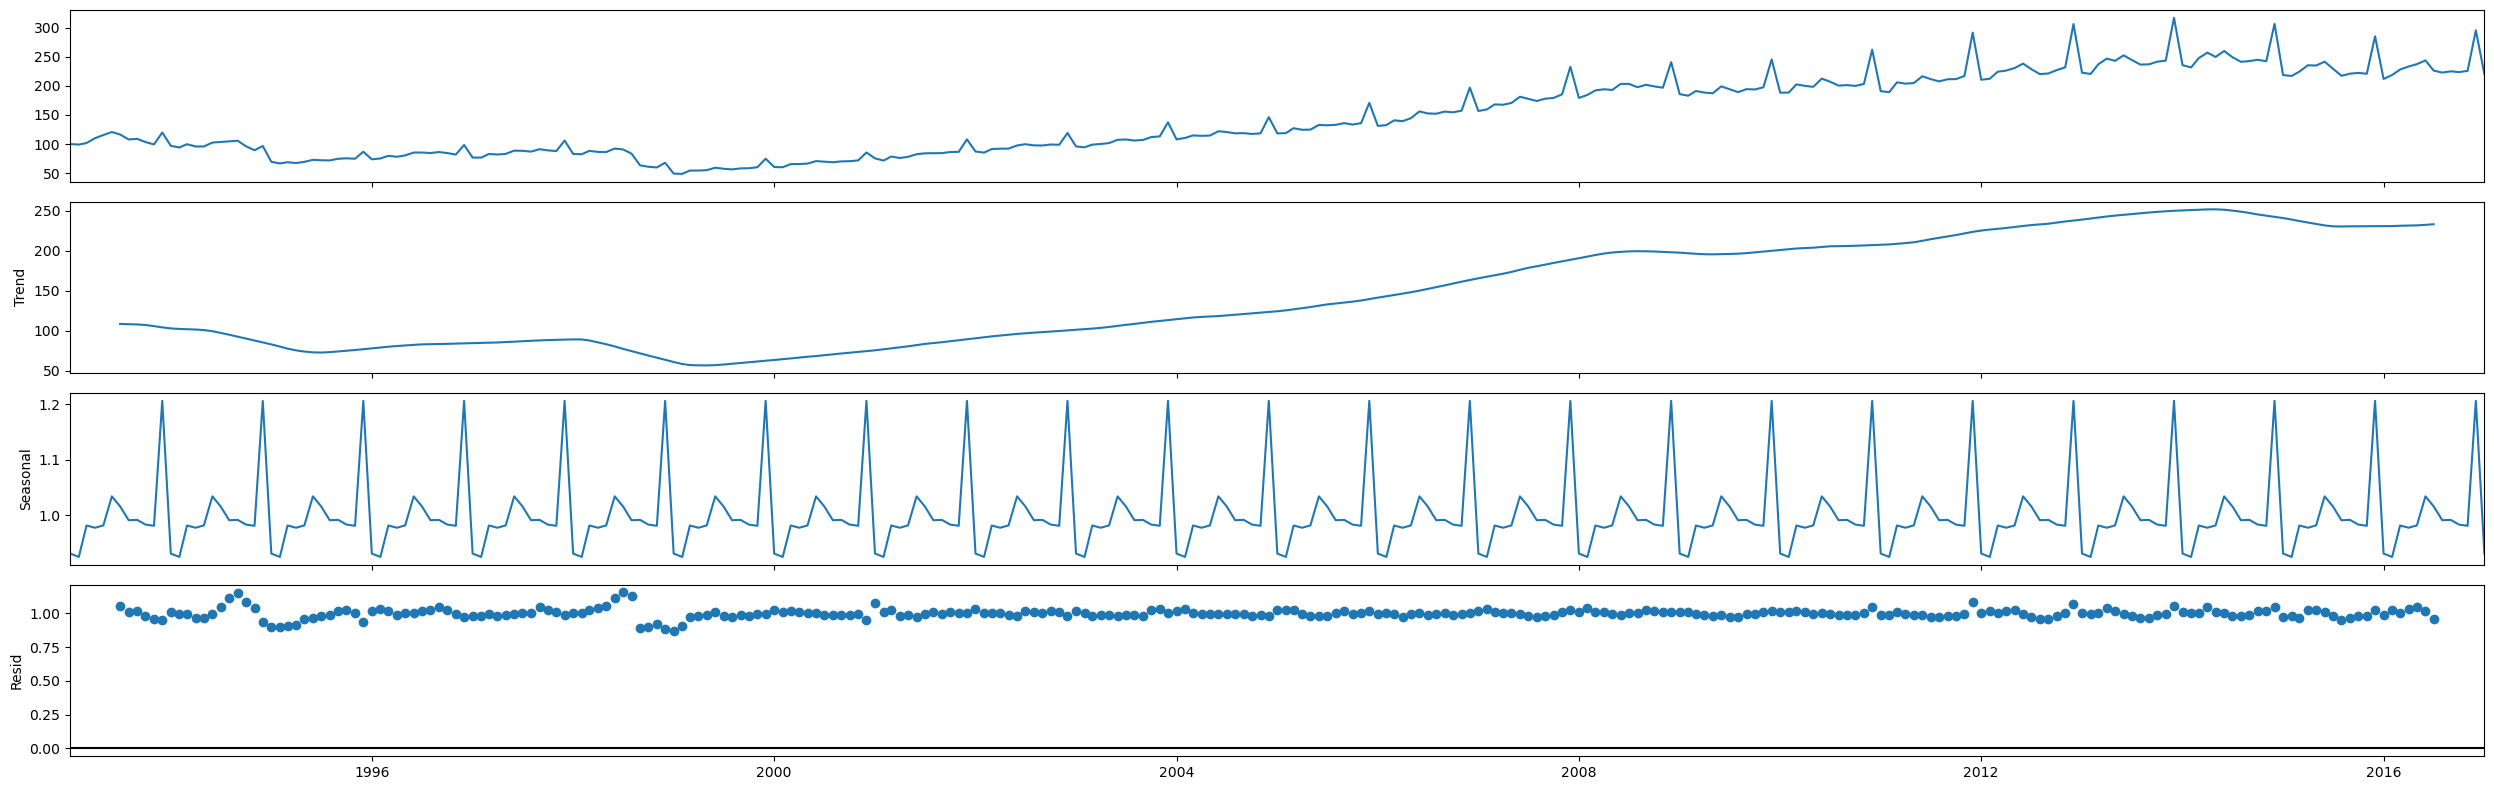

In [8]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(ts_wage, model='multiplicative')
plt.rc("figure", figsize=(25,8))
resplot = res.plot()

* Оценка тренда

Тренд вычисляется скользящим средним (moving average) с окном, равным длине сезонного периода (period).
Если period четное, усредняется два соседних значения, чтобы центрировать тренд.


* Оценка сезонной компоненты

Вычисляется как среднее значение отклонения от тренда для каждой временной точки в пределах сезонного цикла.
Например, если period=12 (месячные данные с годовой сезонностью), то для каждого месяца вычисляется среднее значение отклонения от тренда.


* Оценка остатков

Остаток вычисляется как разница (в аддитивной модели) или отношение (в мультипликативной модели) между исходными данными и суммой (или произведением) тренда и сезонности.


In [9]:
ts_wage.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Timestamp', length=289, freq=None)

Мы видим в ряде выраженные компоненты тренда и сезонности. Значит, он нестационарный.

Проверим это при помощи теста Дики-Фуллера.

In [10]:
from statsmodels.tsa import stattools

df_stat = stattools.adfuller(ts_wage)

print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[4]))

if df_stat[0] > df_stat[4]['5%']:
    print('Есть единичные корни - ряд нестационарный') # 100% верно
else:
    print('Единичных корней нет (возможно, ряд стационарен)') # не всегда верно

The Augmented Dickey-Fuller test statistic -0.230891, 
pvalue: 0.93
critical values: {'1%': -3.45453261164607, '5%': -2.8721859575020017, '10%': -2.572442854861866}
Есть единичные корни - ряд нестационарный


# 2.1.2 Проверка стационарности ряда

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Среднемесячное количество пятен на солнце в зависимости от времени.

In [12]:
ss_df = pd.read_csv('data/sunspots.csv', decimal='.', parse_dates=['Date'], dayfirst=False, index_col='Date')
ss_df = ss_df[[ss_df.columns[1]]]
ss_df.tail(10)

Monthly Mean Total Sunspot Number
Date                                         
2020-04-30                                5.2
2020-05-31                                0.2
2020-06-30                                5.8
2020-07-31                                6.1
2020-08-31                                7.5
2020-09-30                                0.6
2020-10-31                               14.4
2020-11-30                               34.0
2020-12-31                               21.8
2021-01-31                               10.4

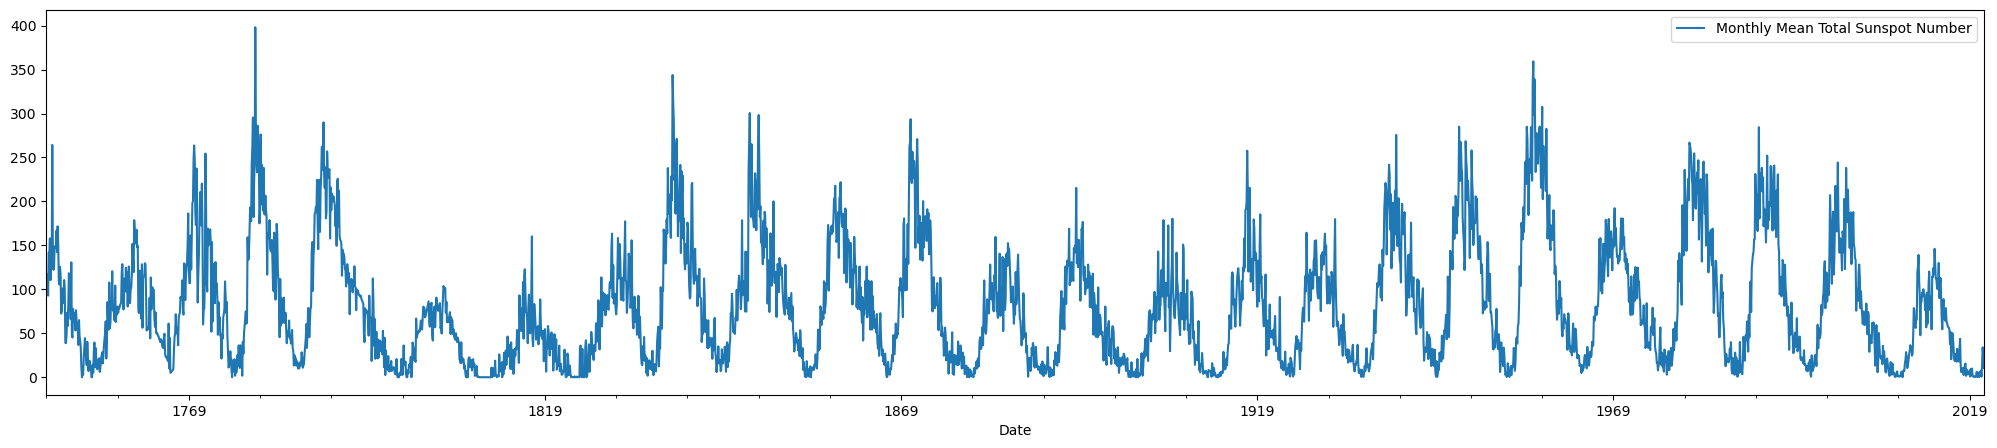

In [13]:
ss_df.plot(figsize = (25,5));

Мы видим в ряде выраженную компоненту сезонности. Значит, он нестационарный.

Проверим это при помощи теста Дики-Фуллера.

## Важно, но сложно

*На самом деле тест Дики-Фуллера не дает гарантии стационарности ряда. Как же так?*

Тест Дики-Фуллера проверяет нулевую гипотезу
**H0:** есть единичный корень (что гарантирует нестационарность ряда)

Но альтернативная гипотеза
**H_A:** нет единичного корня - не гарантирует, что ряд стационарен!

In [14]:
from statsmodels.tsa import stattools

df_stat = stattools.adfuller(ss_df[-1500:])

print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[4]))

if df_stat[0] > df_stat[4]['5%']:
    print('Есть единичные корни - ряд нестационарный')
else:
    print('Единичных корней нет (возможно, ряд стационарен)')

The Augmented Dickey-Fuller test statistic -6.714526, 
pvalue: 0.00
critical values: {'1%': -3.434791163965702, '5%': -2.8635014840083945, '10%': -2.5678142741740877}
Единичных корней нет (возможно, ряд стационарен)


Тест Дики-Фуллера привел нас к неверному результату!

Существуют и другие тесты для проверки наличия у ряда единичного корня. А есть тесты, которые напрямую проверяют стационарность ряда.

Например, широко применяется тест KPSS (Kwiatkowski–Phillips–Schmidt–Shin test). Он проверяет нулевую гипотезу

**H_0:** ряд стационарен

In [15]:
from statsmodels.tsa.stattools import kpss

kpss_stat = stattools.kpss(ss_df[-1000:])
print('The KPSS test statistic %f, \npvalue: %.3f \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[3]))

if kpss_stat[0] > kpss_stat[3]['5%']:
    print('Отвергаем H0, значит, ряд нестационарный')
else:
    print('Ряд стационарный')

The KPSS test statistic 0.468615, 
pvalue: 0.049 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Отвергаем H0, значит, ряд нестационарный


Интересное обсуждение множества различных тестов на наличие единичного корня и стационарность есть [здесь](https://stats.stackexchange.com/questions/30569/what-is-the-difference-between-a-stationary-test-and-a-unit-root-test/235916#235916)

# 2.1.3 Различные стратегии использования критерия Дики-Фуллера

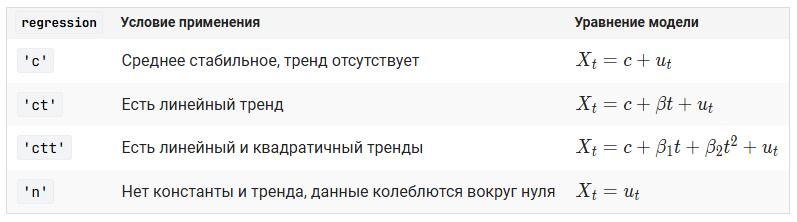

In [16]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Сгенерируем данные с квадратичным трендом
np.random.seed(42)
t = np.arange(1, 101)
u_t = np.random.normal(0, 5, size=100)
x_t = 0.5 * t**2 - 3 * t + 10 + u_t

# ADF тест с различными типами регрессий
for regression in ['c', 'ct', 'ctt', 'n']:
    result = adfuller(x_t, regression=regression)
    print(f"ADF test with regression='{regression}':")
    print(f"Test Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}")
    print()

ADF test with regression='c':
Test Statistic: 0.3886, p-value: 0.9811

ADF test with regression='ct':
Test Statistic: -1.5500, p-value: 0.8114

ADF test with regression='ctt':
Test Statistic: -5.5898, p-value: 0.0001

ADF test with regression='n':
Test Statistic: -1.7457, p-value: 0.0767



### Интерпретация результатов

Если p-value < 0.05, отклоняем нулевую гипотезу $H_0$, и ряд считается стационарным.

Использование 'ctt' улучшает тестирование для рядов с квадратичным трендом, но важно проверять адекватность модели.

*В данном примере мы видим, что ряд был нестационарным из-за наличия квадратичного тренда. После его вычитания ряд стал стационарным.*

# 2.3 Временные ряды для прогноза криптовалют  <br />Занятие 1. Анализ и прогноз временных рядов простыми методами

План семинара:

1. Предобработка временного ряда
2. Генерация признаков
3. Обучение модели регрессии
4. Улучшение модели

## Предобработка временного ряда

Импорт библиотек

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

Будем работать с данными о ежемесячной средней зарплате сотрудников некоторой компании.

In [18]:
ts_wage = pd.read_csv(
    'data/monthly_wage.csv',
    sep=';',
    decimal='.',
    )

ts_wage.head()

Month  Real wage
0  1993-01     100.00
1  1993-02      99.04
2  1993-03     101.77
3  1993-04     110.05
4  1993-05     115.47

In [19]:
ts_wage.dtypes

Month         object
Real wage    float64
dtype: object

In [20]:
ts_wage = pd.read_csv(
    'data/monthly_wage.csv',
    sep=';',
    decimal='.',
    parse_dates=True,
    index_col='Month'
    )

ts_wage.head()

Real wage
Month                
1993-01-01     100.00
1993-02-01      99.04
1993-03-01     101.77
1993-04-01     110.05
1993-05-01     115.47

In [21]:
ts_wage.shape

(289, 1)

Посмотрим как ведет себя временной ряд

<Axes: xlabel='Month'>

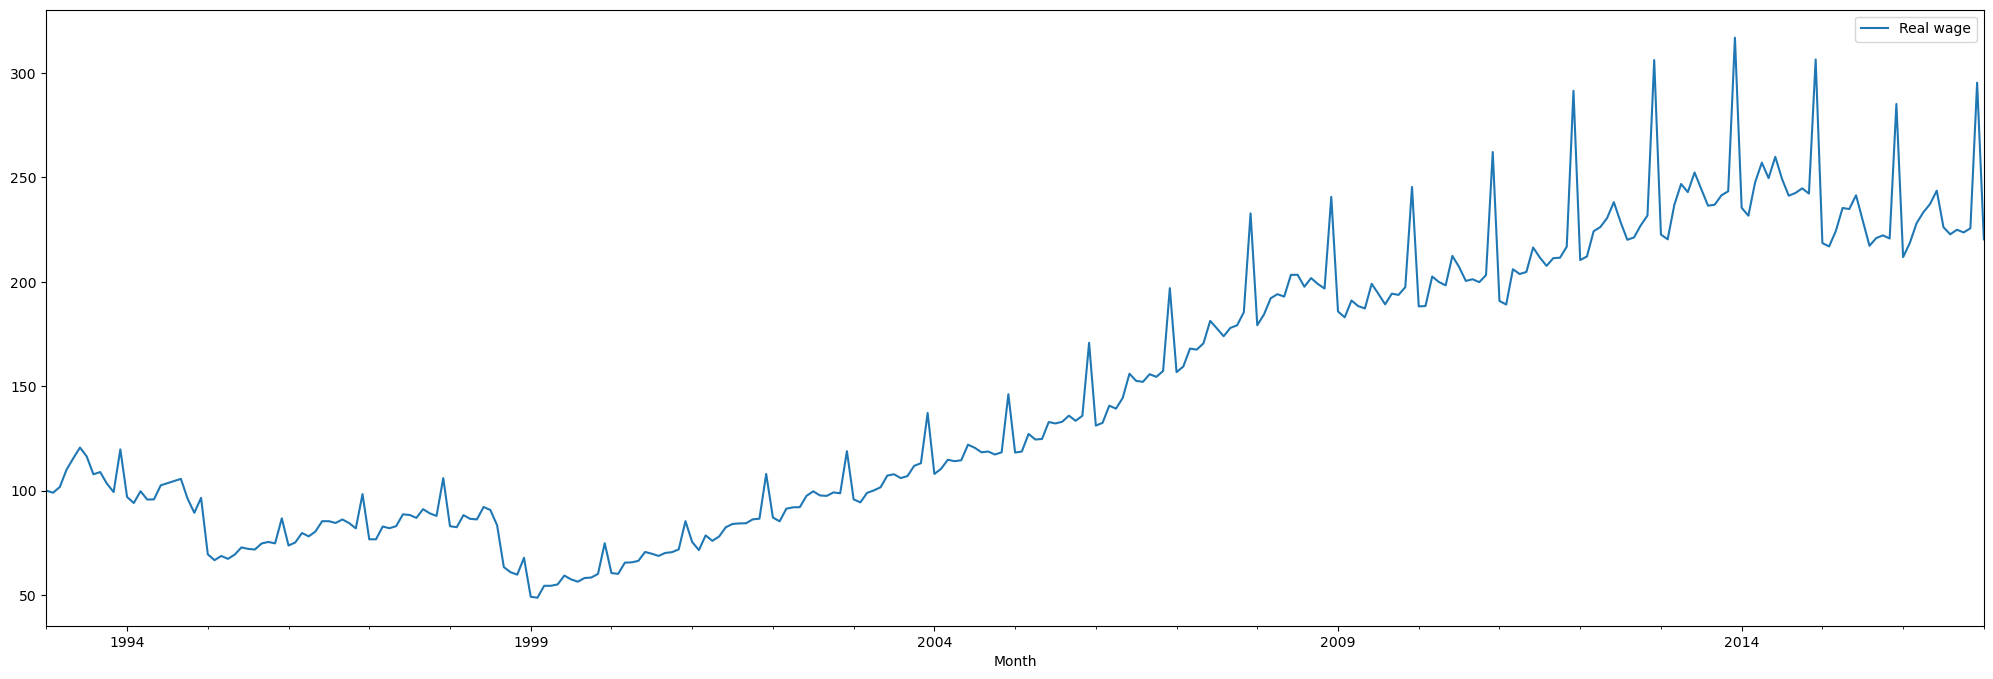

In [22]:
ts_wage.plot()

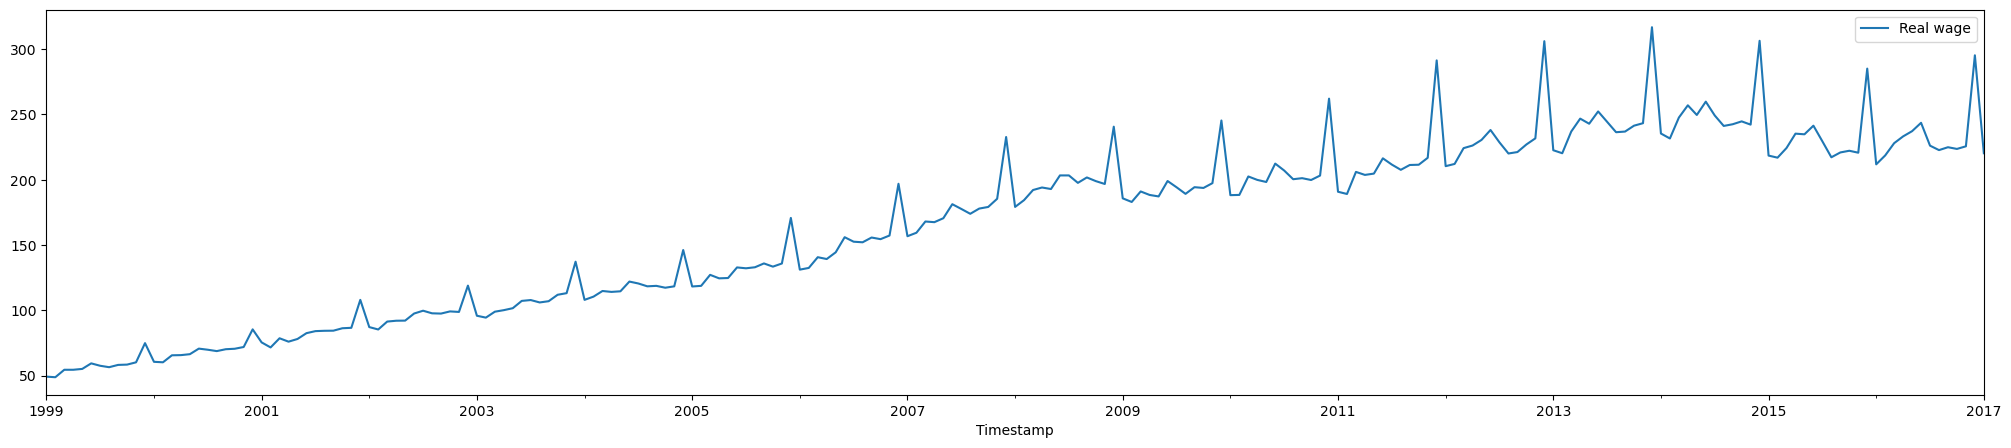

In [23]:
ts_wage.index.names=['Timestamp']
ts_wage = ts_wage.sort_index()

ts_wage = ts_wage.loc['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(25,5));

## Компоненты временного ряда

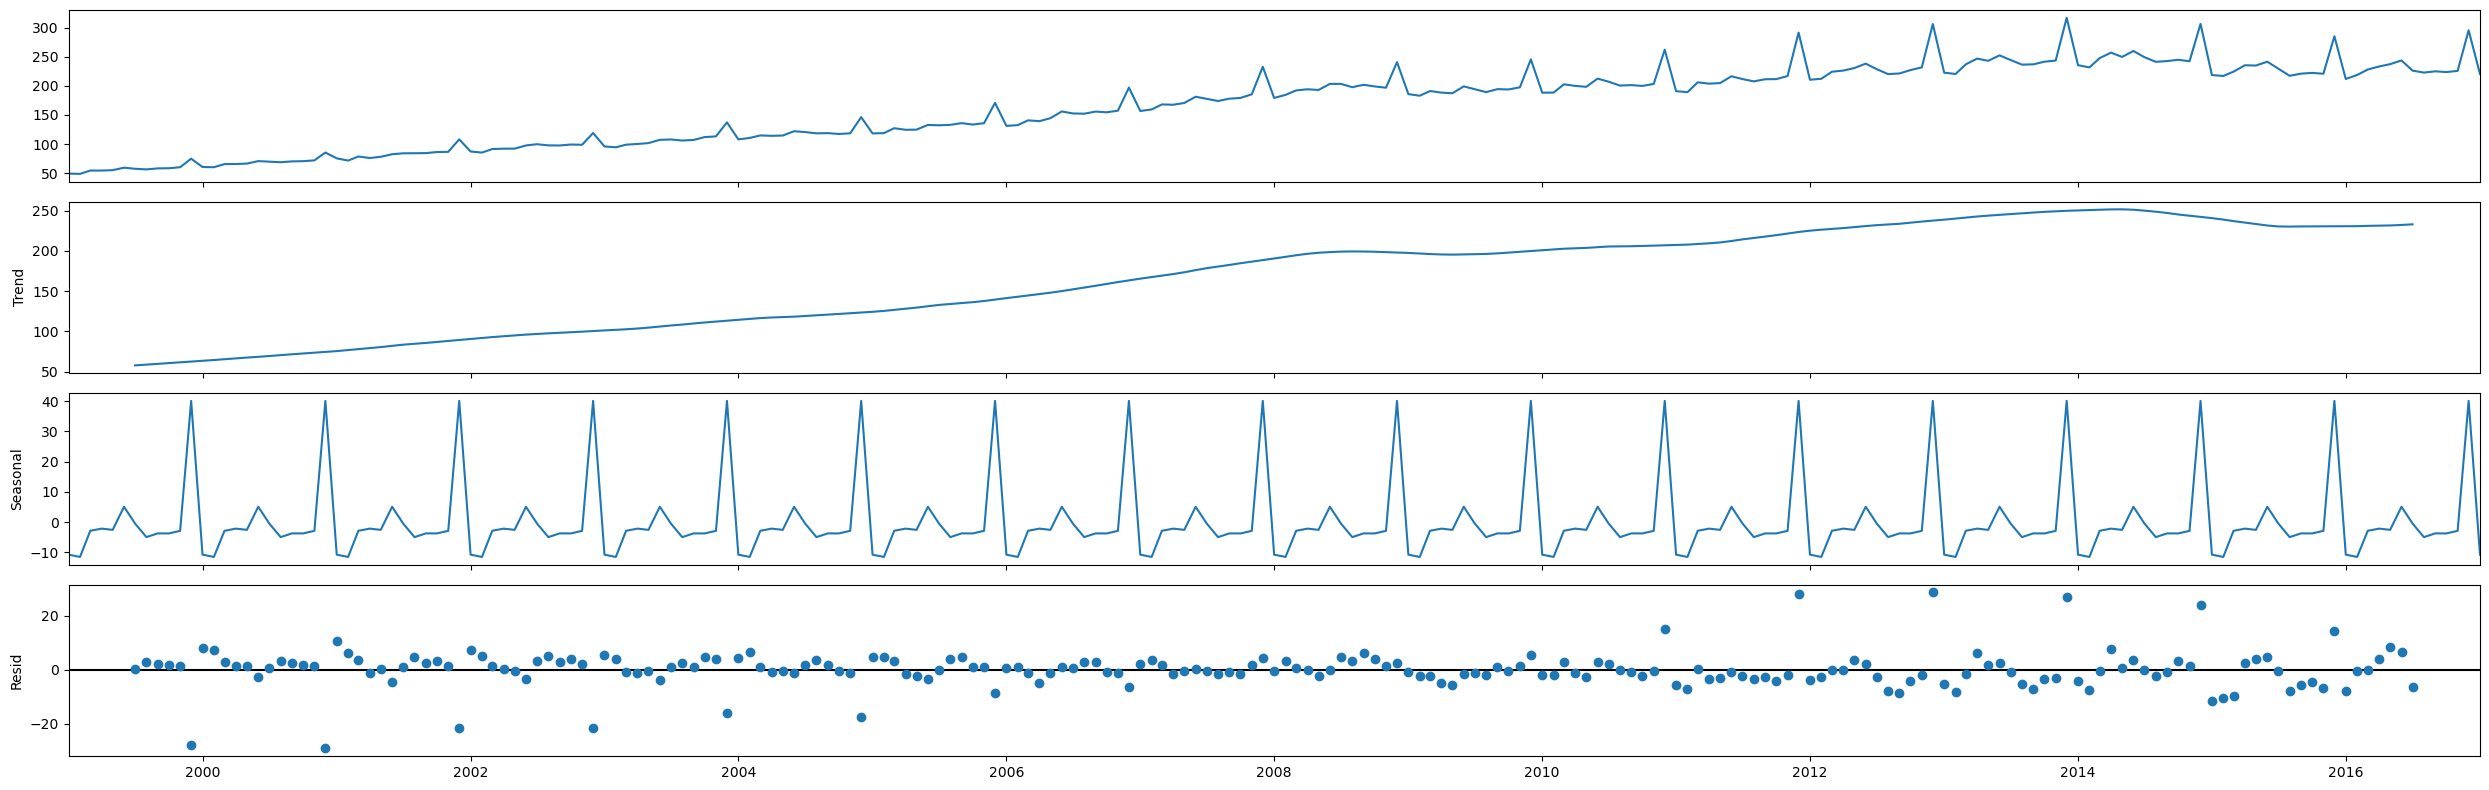

In [24]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(ts_wage) # model= , perod=
plt.rc("figure", figsize=(25,8))
resplot = res.plot()

## Машинное обучение для прогнозирования временных рядов

### Линейная регрессия для прогноза

Пусть


*   $x_1,x_2,...,x_d$ - признаки объекта
*   $y$ - целевая переменная

Линейная регрессия предсказывает целевую переменную $y$ по формуле

$$a(x)=w_0+w_1x_1+...+w_dx_d,$$

где $w_0,w_1,...,w_d$ - заранее неизвестные коэффициенты (веса) модели.



**Пример:**

Для прогноза стоимости дома признаки - это:


*   площадь дома
*   число комнат
*   число этажей
*   удаленность от МКАД

и так далее.



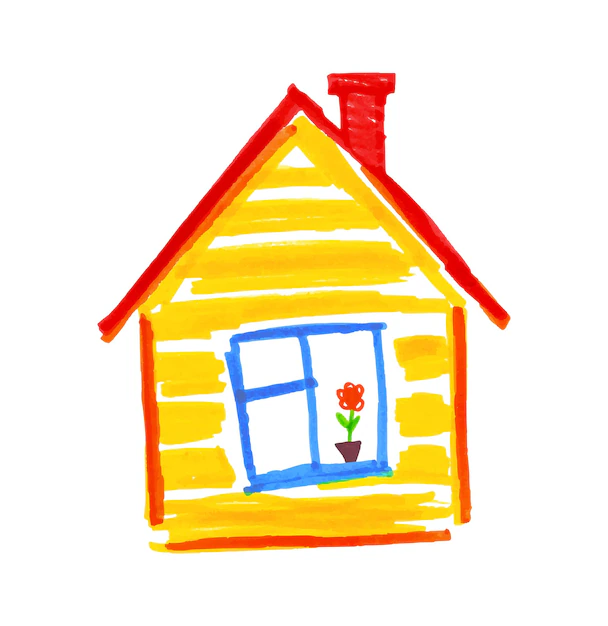

### Что будет признаками для прогноза временного ряда?

### Лаговые признаки (lags)

Это значения ряда в предыдущие моменты времени.

Например, чтобы предсказать курс доллара сегодня ($y_t$), мы можем использовать значения курса доллара за последнюю неделю:

$$y_{t-1},y_{t-2},...,y_{t-7}.$$

Это и будут признаки.

In [25]:
ts_wage['Real wage'].shift(1)

Timestamp
1999-01-01       NaN
1999-02-01     49.22
1999-03-01     48.77
1999-04-01     54.48
1999-05-01     54.48
               ...  
2016-09-01    222.70
2016-10-01    224.90
2016-11-01    223.60
2016-12-01    225.60
2017-01-01    295.30
Name: Real wage, Length: 217, dtype: float64

In [26]:
for i in range(1, 8):
    ts_wage[f"lag_{i}"] = ts_wage['Real wage'].shift(i)

In [27]:
ts_wage.head()

Real wage  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7
Timestamp                                                             
1999-01-01      49.22    NaN    NaN    NaN    NaN    NaN    NaN    NaN
1999-02-01      48.77  49.22    NaN    NaN    NaN    NaN    NaN    NaN
1999-03-01      54.48  48.77  49.22    NaN    NaN    NaN    NaN    NaN
1999-04-01      54.48  54.48  48.77  49.22    NaN    NaN    NaN    NaN
1999-05-01      55.13  54.48  54.48  48.77  49.22    NaN    NaN    NaN

In [28]:
ts_wage.dropna(inplace=True)

ts_wage.head()

Real wage  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7
Timestamp                                                             
1999-08-01      56.45  57.54  59.38  55.13  54.48  54.48  48.77  49.22
1999-09-01      58.20  56.45  57.54  59.38  55.13  54.48  54.48  48.77
1999-10-01      58.43  58.20  56.45  57.54  59.38  55.13  54.48  54.48
1999-11-01      60.18  58.43  58.20  56.45  57.54  59.38  55.13  54.48
1999-12-01      74.87  60.18  58.43  58.20  56.45  57.54  59.38  55.13

### Разбиение на train и test для временных рядов

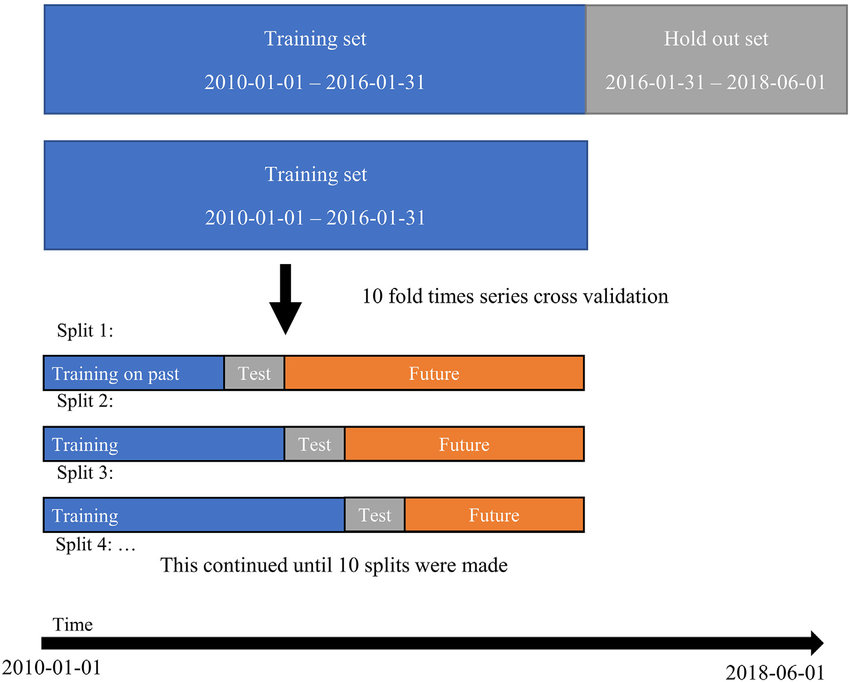

Разобъем данные на тренировочную и тестовую части.

In [29]:
Train = ts_wage.loc['01.01.1999':'31.12.2014']
Test = ts_wage.loc['01.01.2015':'01.01.2017']

Train.shape, Test.shape

((185, 8), (25, 8))

In [30]:
X_train = Train.drop('Real wage', axis=1)
y_train = Train['Real wage']

X_test = Test.drop('Real wage', axis=1)
y_test = Test['Real wage']

## Прогнозирование временных рядов

Обратите внимание, что в функции мы сами по индексу разбили датасет на обучающую и валидационную выборку для обучения моделей. Мы не можем воспользовать train_test_split, так как нам необходимо сохранять хронологию в деление выборки на части, т.е. случайное сэмплирование наблюдений нам не подойдет, в частности, т.к. мы хотим выучить тренд в данных.

Обучим линейную регрессию:

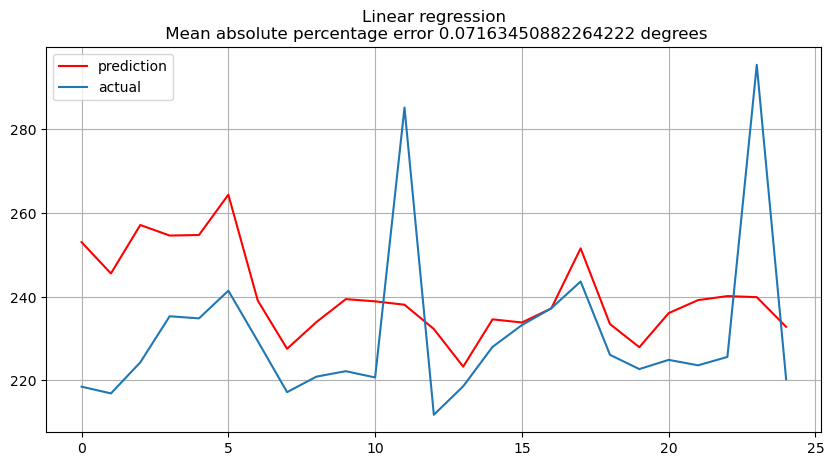

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute percentage error {mean_absolute_percentage_error(preds, y_test)} degrees")
plt.show();

## Кросс-валидация на временных рядах *

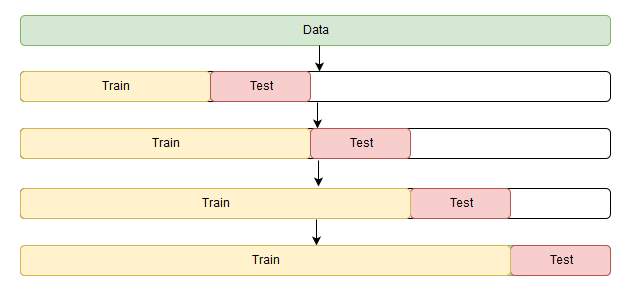


In [32]:
from sklearn.model_selection import TimeSeriesSplit

y = pd.concat([y_train, y_test], axis=0)
X = pd.concat([X_train, X_test], axis=0)

errors = []

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    errors.append(mean_absolute_error(preds, y_test))

np.mean(errors)

11.659882921796395

In [33]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=TimeSeriesSplit(n_splits=5)).mean()

-11.659882921796394

## Улучшение модели

Какие еще признаки можно использовать?

Напишем функцию, которая возвращает словарь, где ключами являются уникальные категории признака `cat_feature`, а значениями - средние по `real_feature`.

In [34]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

Давайте достанем из дат отдельно номер месяца и год и добавим их как новые признаки.

In [35]:
data = ts_wage.copy()

ts_wage["month"] = ts_wage.index.month
ts_wage["year"] = ts_wage.index.year

ts_wage.head()

Real wage  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  month  \
Timestamp                                                                       
1999-08-01      56.45  57.54  59.38  55.13  54.48  54.48  48.77  49.22      8   
1999-09-01      58.20  56.45  57.54  59.38  55.13  54.48  54.48  48.77      9   
1999-10-01      58.43  58.20  56.45  57.54  59.38  55.13  54.48  54.48     10   
1999-11-01      60.18  58.43  58.20  56.45  57.54  59.38  55.13  54.48     11   
1999-12-01      74.87  60.18  58.43  58.20  56.45  57.54  59.38  55.13     12   

            year  
Timestamp         
1999-08-01  1999  
1999-09-01  1999  
1999-10-01  1999  
1999-11-01  1999  
1999-12-01  1999

Вычислим среднее значение целевой переменной по месяцам и по годам:

In [36]:
code_mean(ts_wage, "month", "Real wage")

{1: 160.89666666666665,
 2: 157.46941176470588,
 3: 166.93176470588236,
 4: 168.45529411764704,
 5: 168.85764705882352,
 6: 177.4335294117647,
 7: 172.83529411764704,
 8: 162.39277777777775,
 9: 164.47777777777776,
 10: 165.20222222222222,
 11: 166.95555555555555,
 12: 212.23611111111111}

In [37]:
code_mean(ts_wage, "year", "Real wage")

{1999: 61.626,
 2000: 68.81666666666666,
 2001: 82.98916666666666,
 2002: 96.44666666666666,
 2003: 106.78083333333332,
 2004: 118.6275,
 2005: 132.28666666666666,
 2006: 151.0925,
 2007: 177.52416666666667,
 2008: 198.74749999999997,
 2009: 195.715,
 2010: 205.28,
 2011: 213.40833333333333,
 2012: 231.35,
 2013: 245.07500000000002,
 2014: 250.6,
 2015: 230.5583333333333,
 2016: 232.54999999999998,
 2017: 220.3}

Можно это удобно обернуть все шаги в функцию и заменить исходные признаки на их среднее как один из вариантов препроцессинга, а также - добавить значения целевой переменной с разной длиной временного лага.

В функции мы:

1) Разбиваем данные на тренировочную и тестовую части

2) Генерируем лаговые признаки

3) Генерируем агрегированные признаки

In [38]:
def preprocess_data(data, lag_start=1, lag_end=8, date_cut='31.12.2014'):

    data = pd.DataFrame(data.copy())

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data['Real wage'].shift(i)

    data = data.dropna()

    data["month"] = data.index.month

    # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
    data["month_average"] = list(map(code_mean(data.loc[:date_cut], "month", "Real wage").get, data['month']))

    # выкидываем закодированные средними признаки
    data.drop(["month"], axis=1, inplace=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:date_cut].drop(["Real wage"], axis=1)
    y_train = data.loc[:date_cut]["Real wage"]
    X_test = data.loc[date_cut:].drop(["Real wage"], axis=1)
    y_test = data.loc[date_cut:]["Real wage"]

    return X_train, X_test, y_train, y_test

Заново загрузим данные, чтобы ничего не изменить случайно

In [39]:
ts_wage = pd.read_csv(
    'data/monthly_wage.csv',
    sep=';',
    decimal='.',
    parse_dates=True,
    index_col='Month'
    )

ts_wage.index.names=['Timestamp']
ts_wage = ts_wage.sort_index()

ts_wage = ts_wage.loc['01.01.1999':'01.01.2017']

In [40]:
X_train, X_test, y_train, y_test = preprocess_data(ts_wage)

X_train.shape, X_test.shape

((185, 8), (25, 8))

In [41]:
X_train.head()

lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  month_average
Timestamp                                                                 
1999-08-01  57.54  59.38  55.13  54.48  54.48  48.77  49.22     155.198125
1999-09-01  56.45  57.54  59.38  55.13  54.48  54.48  48.77     157.175000
1999-10-01  58.20  56.45  57.54  59.38  55.13  54.48  54.48     157.990000
1999-11-01  58.43  58.20  56.45  57.54  59.38  55.13  54.48     159.931250
1999-12-01  60.18  58.43  58.20  56.45  57.54  59.38  55.13     202.490625

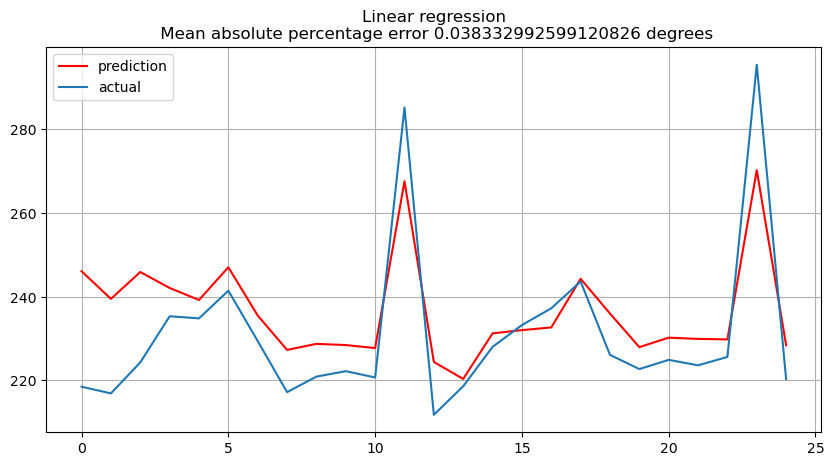

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute percentage error {mean_absolute_percentage_error(preds, y_test)} degrees")
plt.show();

# 2.4 Домашнее задание

В этом домашнем задании предлагаем вам попрактиковаться в прогнозировании стоимости биткоина при помощи линейной регрессии.

In [43]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("data/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

open     high       low     close   volume
timestamp                                                          
2023-06-18 00:00:00  26519.10  26542.5  26501.76  26515.80  35.4498
2023-06-18 00:05:00  26508.01  26535.0  26506.13  26511.30   7.4262
2023-06-18 00:10:00  26511.30  26551.0  26508.77  26519.62  18.9461
2023-06-18 00:15:00  26519.44  26550.0  26464.43  26511.99  89.2364
2023-06-18 00:20:00  26513.33  26541.0  26414.28  26439.52  90.0204

Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

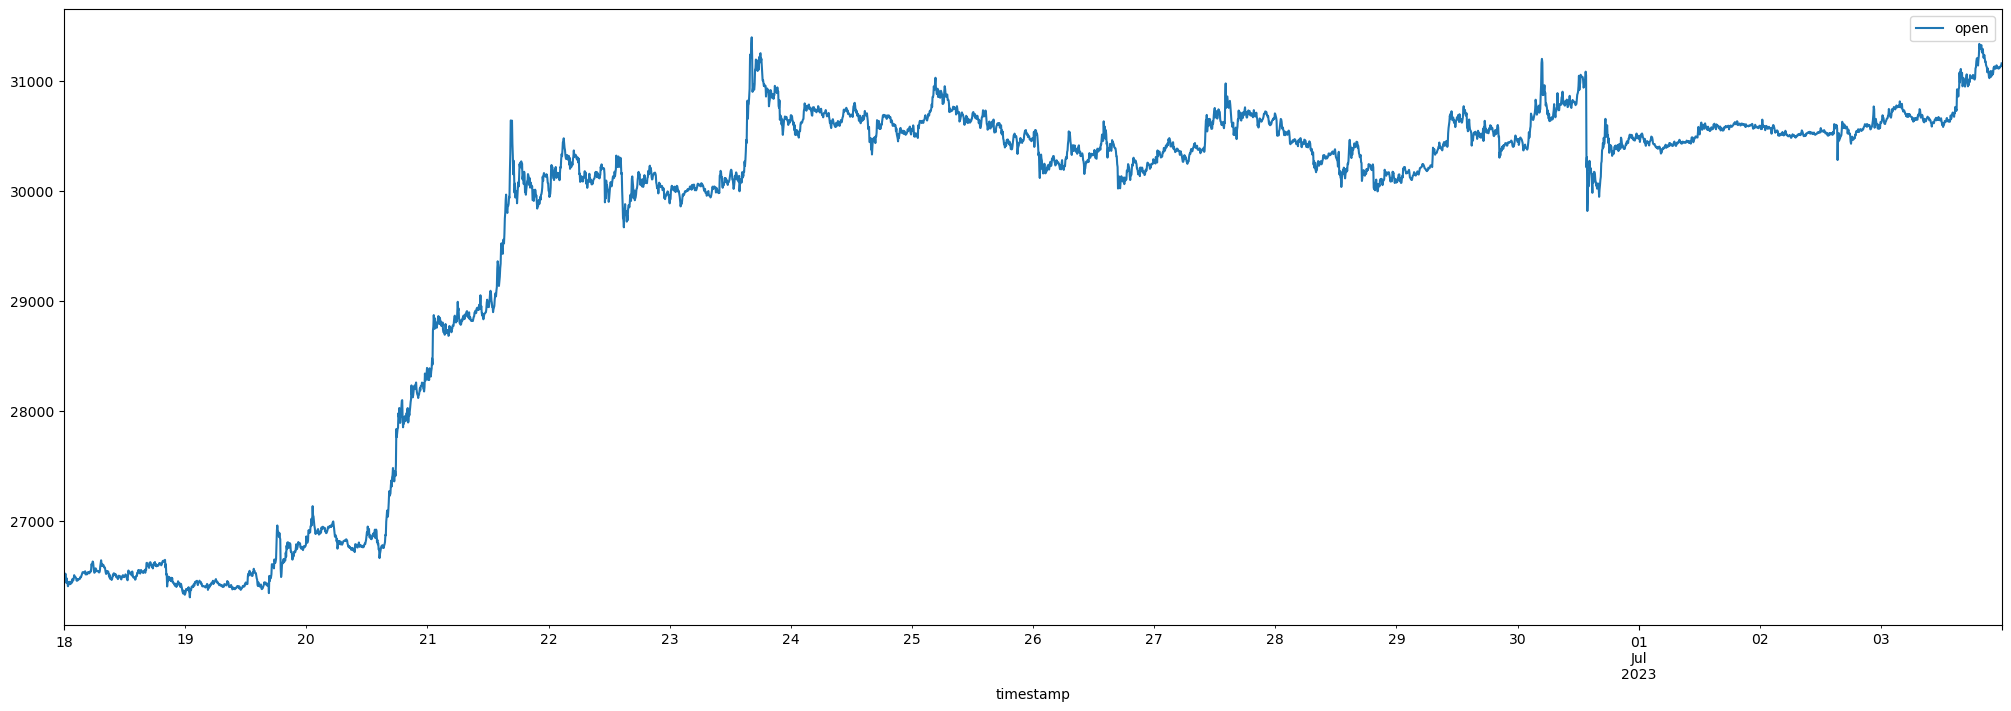

In [44]:
data = data[['open']]

data.plot()
plt.show();

Проделайте следующие шаги:

* Разбейте данные на тренировочную и тестовую часть. В тест отправьте 15% данных

* Извлеките лаговые признаки

* Извлеките агрегированные признаки (средняя стоимость за день, час)

Рекомендуется использовать функцию preprocess_data с вебинара (однако, надо будет незначительно ее поменять, исходя из данных задачи).

Задайте гиперпараметры по умолчанию (в функции preprocess_data, если будете использовать ее):
* `lag_start`=5
* `lag_end`=20
* `test_size`=0.15

In [45]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f'lag_{i}'] = data['open'].shift(i)

    data = data.dropna()

    data['day_of_week'] = data.index.day_of_week
    data['hour'] = data.index.hour

    # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
    data['day_of_week_average'] = list(map(code_mean(data, 'day_of_week', 'open').get, data['day_of_week']))
    data['hour_average'] = list(map(code_mean(data, 'hour', 'open').get, data['hour']))

    # выкидываем закодированные средними признаки
    data.drop(['day_of_week'], axis=1, inplace=True)
    data.drop(['hour'], axis=1, inplace=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X = data.drop(['open'], axis=1)
    y = data['open']
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=test_size)

    return X_train, X_test, y_train, y_test

In [48]:
data.head()

open
timestamp                    
2023-06-18 00:00:00  26519.10
2023-06-18 00:05:00  26508.01
2023-06-18 00:10:00  26511.30
2023-06-18 00:15:00  26519.44
2023-06-18 00:20:00  26513.33

Обучите линейную регрессию с гиперпараметрами по умолчанию на тренировочных данных и вычислите ошибку MAE на тестовых данных.

Чему она получилась равна? (Ответ округлите до целого числа).

Также нарисуйте график правильного ответа и прогноза на тесте.

In [49]:
data = pd.read_csv("data/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data = data[['open']]
data = data.sort_index()

data.head()

open
timestamp                    
2023-06-18 00:00:00  26519.10
2023-06-18 00:05:00  26508.01
2023-06-18 00:10:00  26511.30
2023-06-18 00:15:00  26519.44
2023-06-18 00:20:00  26513.33

In [50]:
X_train, X_test, y_train, y_test = preprocess_data(data)

X_train.shape, X_test.shape

((3900, 17), (689, 17))

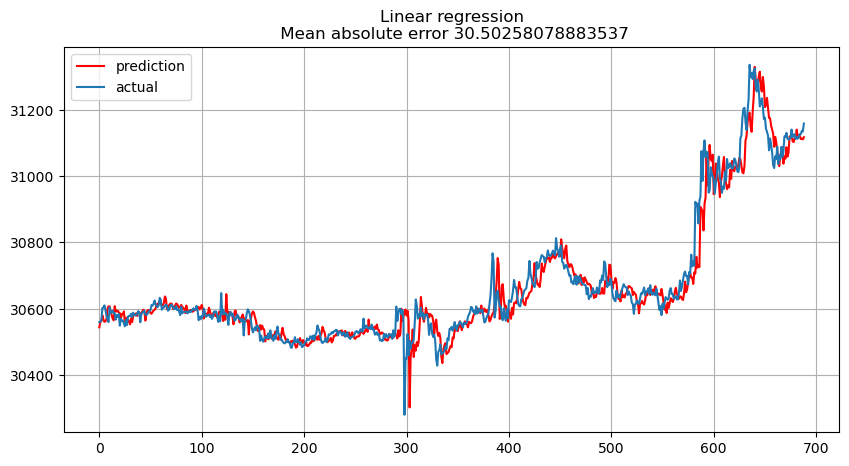

In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)}")
plt.show();

Попробуйте подобрать гиперпараметры `lag_start`, `lag_end`, а также придумать новые полезные агрегрированные признаки для улучшения качества прогноза.

Пропорции разбиения (в тесте 15% данных) не трогайте. Ошибку MAE все так же считайте на тесте.

In [52]:
def preprocess_data(data, lag_start=1, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f'lag_{i}'] = data['open'].shift(i)

    data = data.dropna()

    data['day_of_week'] = data.index.day_of_week
    data['hour'] = data.index.hour
    data['hour'] = data.index.hour

    # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
    data['day_of_week_average'] = list(map(code_mean(data, 'day_of_week', 'open').get, data['day_of_week']))
    data['hour_average'] = list(map(code_mean(data, 'hour', 'open').get, data['hour']))

    # выкидываем закодированные средними признаки
    # data.drop(['day_of_week'], axis=1, inplace=True)
    data.drop(['hour'], axis=1, inplace=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X = data.drop(['open'], axis=1)
    y = data['open']
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=test_size)

    return X_train, X_test, y_train, y_test

In [53]:
data.head()

open
timestamp                    
2023-06-18 00:00:00  26519.10
2023-06-18 00:05:00  26508.01
2023-06-18 00:10:00  26511.30
2023-06-18 00:15:00  26519.44
2023-06-18 00:20:00  26513.33

In [54]:
data = pd.read_csv("data/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data = data[['open']]
data = data.sort_index()

X_train, X_test, y_train, y_test = preprocess_data(data)

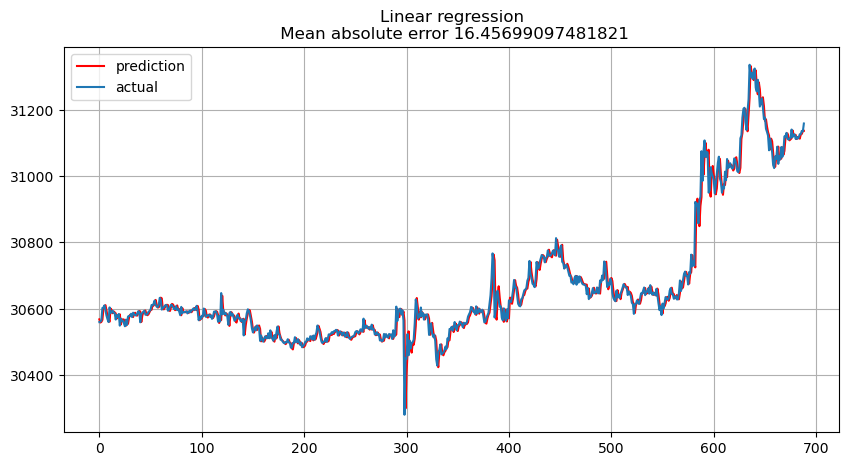

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)}")
plt.show();

# 4.1 Прогнозирование временных рядов при помощи машинного обучения

Что обсудим:

1. Генерация признаков
2. Обучение модели регрессии на сгенерированных признаках

## Предобработка временного ряда

Импорт библиотек

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

Будем работать с данными о ежемесячной средней зарплате сотрудников некоторой компании.

In [57]:
ts_wage = pd.read_csv(
    'data/monthly_wage.csv',
    sep=';',
    decimal='.',
    parse_dates=True,
    index_col='Month'
    )

ts_wage.head()

Real wage
Month                
1993-01-01     100.00
1993-02-01      99.04
1993-03-01     101.77
1993-04-01     110.05
1993-05-01     115.47

In [58]:
ts_wage.shape

(289, 1)

Посмотрим как ведет себя временной ряд

<Axes: xlabel='Month'>

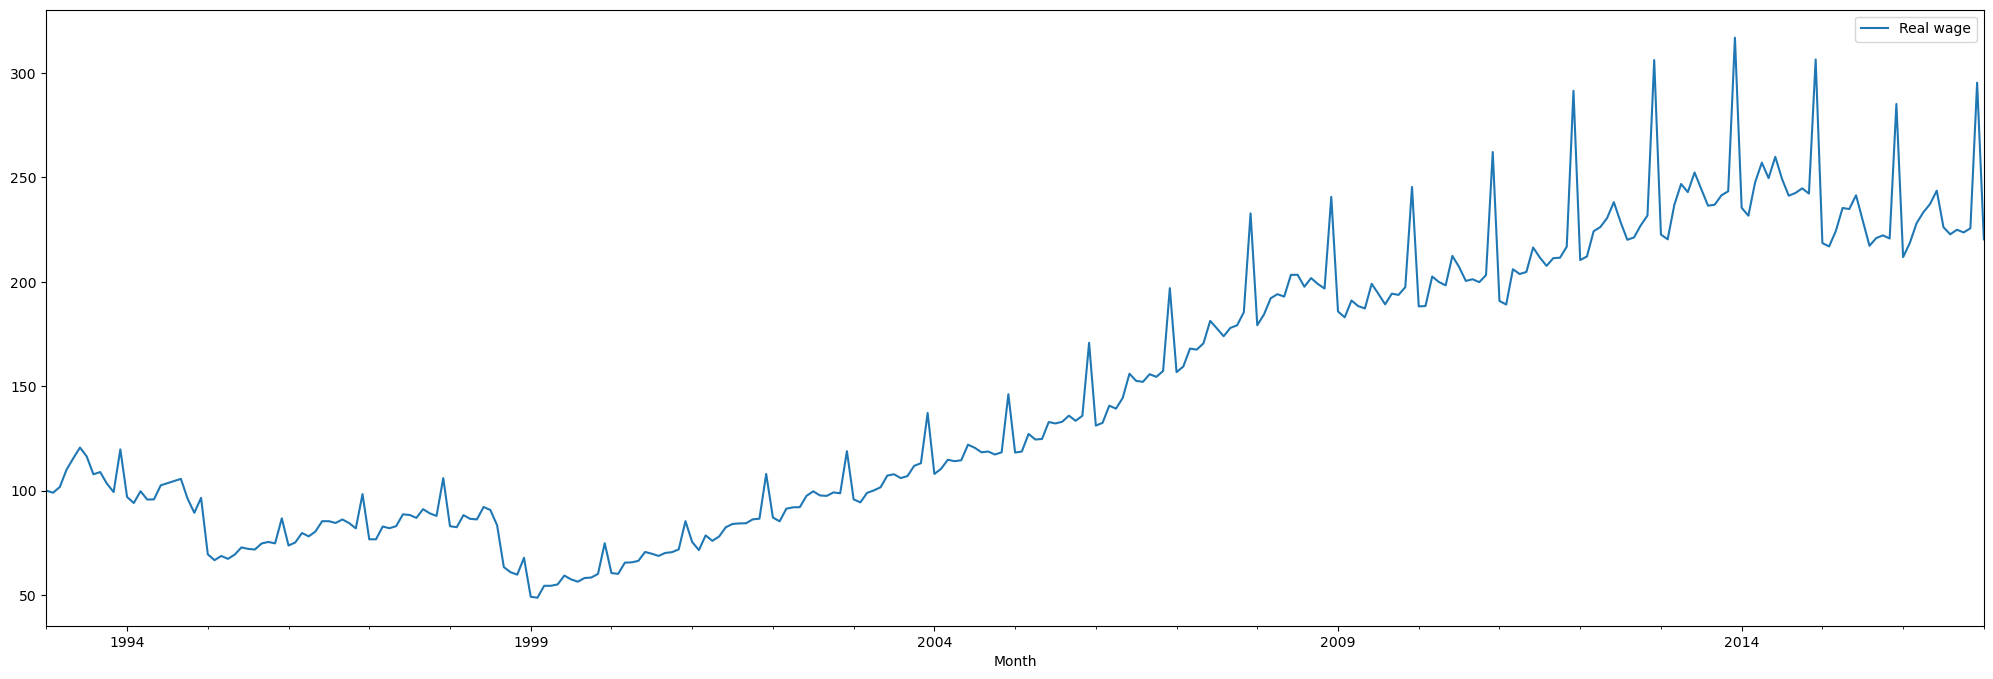

In [59]:
ts_wage.plot()

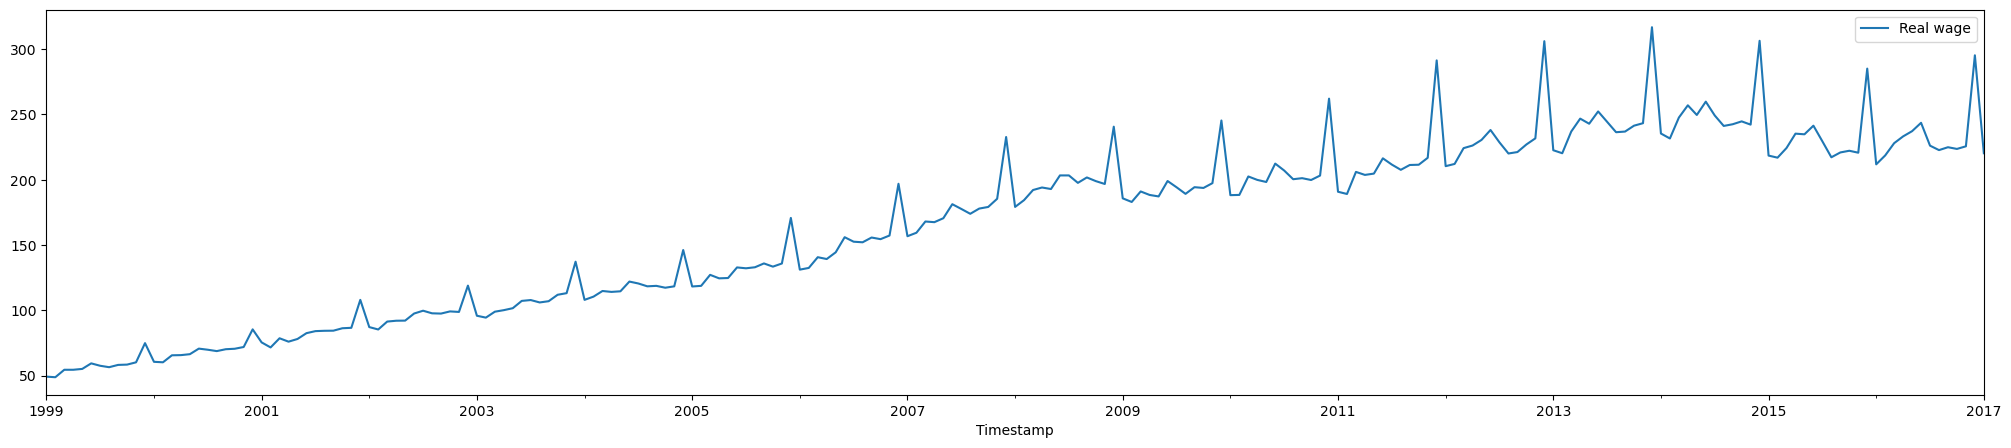

In [60]:
ts_wage.index.names=['Timestamp']
ts_wage = ts_wage.sort_index()

ts_wage = ts_wage.loc['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(25,5));

## Машинное обучение для прогнозирования временных рядов

### Что будет признаками для прогноза временного ряда?

### Лаговые признаки (lags)

Это значения ряда в предыдущие моменты времени.

Например, чтобы предсказать курс доллара сегодня ($y_t$), мы можем использовать значения курса доллара за последнюю неделю:

$$y_{t-1},y_{t-2},...,y_{t-7}.$$

Это и будут признаки.

In [61]:
ts_wage['Real wage'].shift(1)

Timestamp
1999-01-01       NaN
1999-02-01     49.22
1999-03-01     48.77
1999-04-01     54.48
1999-05-01     54.48
               ...  
2016-09-01    222.70
2016-10-01    224.90
2016-11-01    223.60
2016-12-01    225.60
2017-01-01    295.30
Name: Real wage, Length: 217, dtype: float64

In [62]:
for i in range(1, 8):
    ts_wage[f"lag_{i}"] = ts_wage['Real wage'].shift(i)

In [63]:
ts_wage.head()

Real wage  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7
Timestamp                                                             
1999-01-01      49.22    NaN    NaN    NaN    NaN    NaN    NaN    NaN
1999-02-01      48.77  49.22    NaN    NaN    NaN    NaN    NaN    NaN
1999-03-01      54.48  48.77  49.22    NaN    NaN    NaN    NaN    NaN
1999-04-01      54.48  54.48  48.77  49.22    NaN    NaN    NaN    NaN
1999-05-01      55.13  54.48  54.48  48.77  49.22    NaN    NaN    NaN

In [64]:
ts_wage.dropna(inplace=True)

ts_wage.head()

Real wage  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7
Timestamp                                                             
1999-08-01      56.45  57.54  59.38  55.13  54.48  54.48  48.77  49.22
1999-09-01      58.20  56.45  57.54  59.38  55.13  54.48  54.48  48.77
1999-10-01      58.43  58.20  56.45  57.54  59.38  55.13  54.48  54.48
1999-11-01      60.18  58.43  58.20  56.45  57.54  59.38  55.13  54.48
1999-12-01      74.87  60.18  58.43  58.20  56.45  57.54  59.38  55.13

### Разбиение на train и test для временных рядов

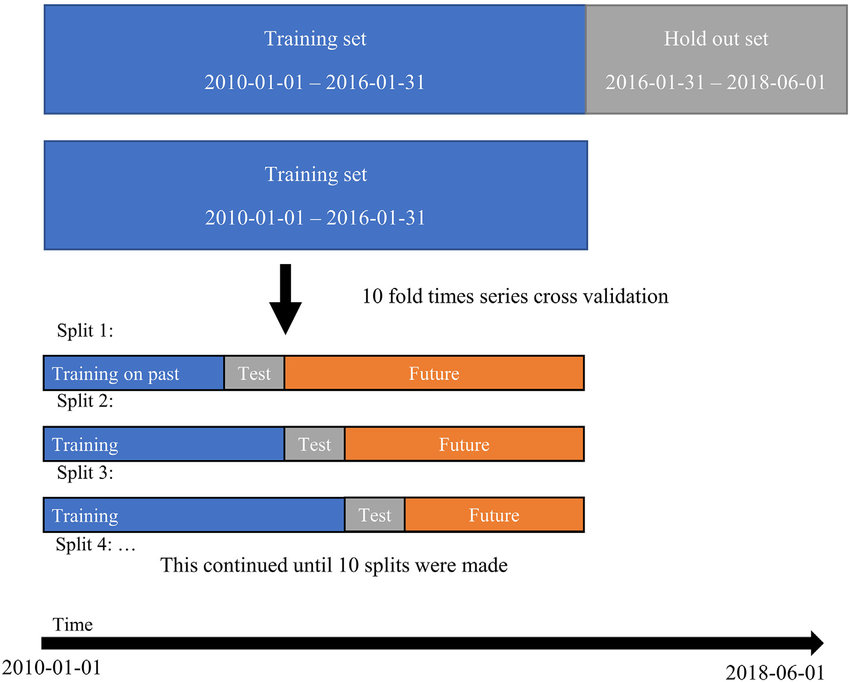

Разобъем данные на тренировочную и тестовую части.

In [65]:
Train = ts_wage.loc['01.01.1999':'31.12.2014']
Test = ts_wage.loc['01.01.2015':'01.01.2017']

Train.shape, Test.shape

((185, 8), (25, 8))

In [66]:
X_train = Train.drop('Real wage', axis=1)
y_train = Train['Real wage']

X_test = Test.drop('Real wage', axis=1)
y_test = Test['Real wage']

## Прогнозирование временных рядов

Обратите внимание, что в функции мы сами по индексу разбили датасет на обучающую и валидационную выборку для обучения моделей. Мы не можем воспользовать train_test_split, так как нам необходимо сохранять хронологию в деление выборки на части, т.е. случайное сэмплирование наблюдений нам не подойдет, в частности, т.к. мы хотим выучить тренд в данных.

Обучим линейную регрессию:

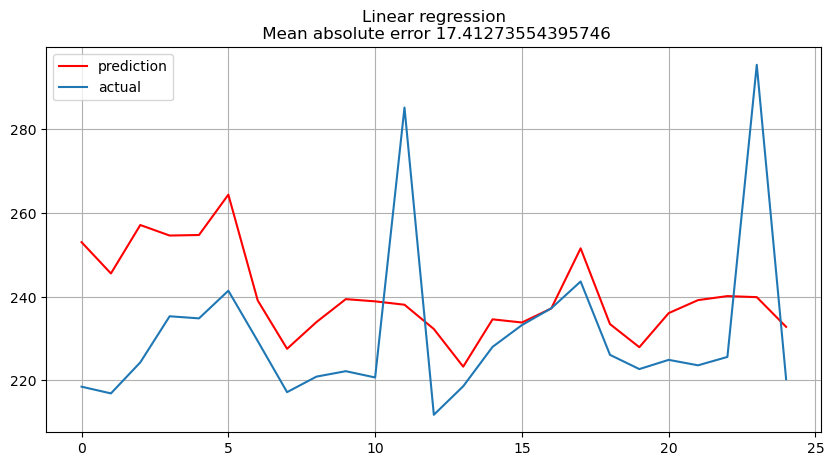

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)}")
plt.show();

## Агрегированные признаки

Какие еще признаки можно использовать?

Напишем функцию, которая возвращает словарь, где ключами являются уникальные категории признака `cat_feature`, а значениями - средние по `real_feature`.

In [68]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

Давайте достанем из дат отдельно номер месяца и год и добавим их как новые признаки.

In [69]:
data = ts_wage.copy()

ts_wage["month"] = ts_wage.index.month

ts_wage.head()

Real wage  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  month
Timestamp                                                                    
1999-08-01      56.45  57.54  59.38  55.13  54.48  54.48  48.77  49.22      8
1999-09-01      58.20  56.45  57.54  59.38  55.13  54.48  54.48  48.77      9
1999-10-01      58.43  58.20  56.45  57.54  59.38  55.13  54.48  54.48     10
1999-11-01      60.18  58.43  58.20  56.45  57.54  59.38  55.13  54.48     11
1999-12-01      74.87  60.18  58.43  58.20  56.45  57.54  59.38  55.13     12

Вычислим среднее значение целевой переменной по месяцам и по годам:

In [70]:
code_mean(ts_wage, "month", "Real wage")

{1: 160.89666666666665,
 2: 157.46941176470588,
 3: 166.93176470588236,
 4: 168.45529411764704,
 5: 168.85764705882352,
 6: 177.4335294117647,
 7: 172.83529411764704,
 8: 162.39277777777775,
 9: 164.47777777777776,
 10: 165.20222222222222,
 11: 166.95555555555555,
 12: 212.23611111111111}

Можно это удобно обернуть все шаги в функцию и заменить исходные признаки на их среднее как один из вариантов препроцессинга, а также - добавить значения целевой переменной с разной длиной временного лага.

В функции мы:

1) Разбиваем данные на тренировочную и тестовую части

2) Генерируем лаговые признаки

3) Генерируем агрегированные признаки

In [71]:
def preprocess_data(data, lag_start=1, lag_end=8, date_cut='31.12.2014'):

    data = pd.DataFrame(data.copy())

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data['Real wage'].shift(i)

    data = data.dropna()

    data["month"] = data.index.month

    # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
    data["month_average"] = list(map(code_mean(data.loc[:date_cut], "month", "Real wage").get, data.month))

    # выкидываем закодированные средними признаки
    data.drop(["month"], axis=1, inplace=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:date_cut].drop(["Real wage"], axis=1)
    y_train = data.loc[:date_cut]["Real wage"]
    X_test = data.loc[date_cut:].drop(["Real wage"], axis=1)
    y_test = data.loc[date_cut:]["Real wage"]

    return X_train, X_test, y_train, y_test

In [72]:
X_train, X_test, y_train, y_test = preprocess_data(ts_wage)

X_train.shape, X_test.shape

((178, 8), (25, 8))

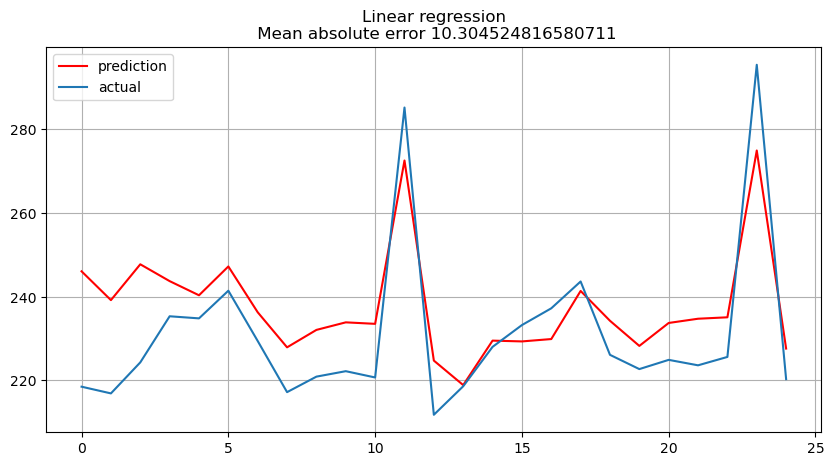

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)}")
plt.show();

## Кросс-валидация на временных рядах
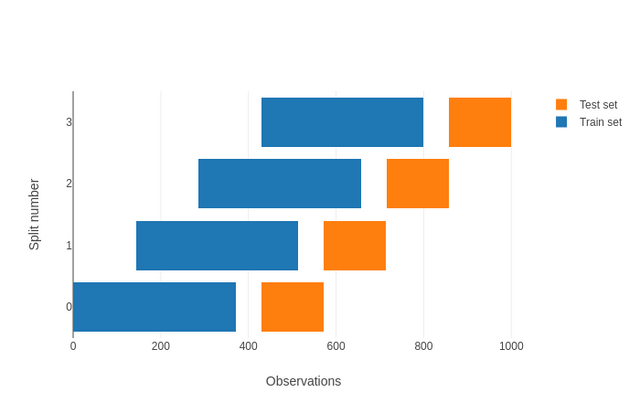 <br><br>
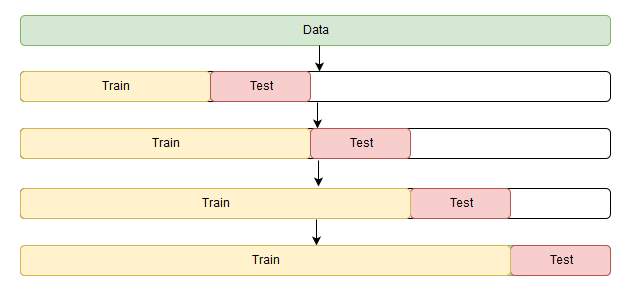


In [74]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error

y = pd.concat([y_train, y_test], axis=0)
X = pd.concat([X_train, X_test], axis=0)

errors = []

tscv = TimeSeriesSplit(n_splits=5)

i = 0
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    errors.append(mean_absolute_percentage_error(preds, y_test))
    print(i, len(X_train))
    i+=1

np.mean(errors)

0 38
1 71
2 104
3 137
4 170


0.036383748117867265

# 4.2 Фреймворки для работы с временными рядами в Python

# Импорты

In [75]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm.notebook import tqdm

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

Возьмем датасет, в котором будет присутвовать переменная, изменяющася во времени. Давайте сегодня попробуем поработать с набором данных по среднесуточной дневной температуре в городе Дели, собранном за несколько лет. Подробнее почитать про датасет можно на [Kaggle](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)

Датасет сразу разбит на две части - train и test, но будем использовать для обучения и валидации моделей только train, оставив test как отложенную выборку для проверки качества.

# ETNA (от Тинькофф)

Первая общедоступная версия библиотеки появилась в сентябре 2021 г.

In [76]:
# !pip install "etna[prophet]" -q --use-deprecated=legacy-resolver
# !pip install etna -q

In [77]:
import pandas as pd

df = pd.read_csv('data/DailyDelhiClimateTrain.csv')

df = df[['date','meantemp']]

In [78]:
df.head()

date   meantemp
0  2013-01-01  10.000000
1  2013-01-02   7.400000
2  2013-01-03   7.166667
3  2013-01-04   8.666667
4  2013-01-05   6.000000

<!-- Приведем данные к формату, с которым работает ETNA:

* колонка `timestamp` - время в формате datetime
* колонка `target` - целевая переменная (прогнозируемый ряд)
* колонка `segment` - `main` в случае, если целевая переменная - это один ряд -->

In [79]:
df["timestamp"] = pd.to_datetime(df["date"])
df["target"] = df["meantemp"]
df.drop(columns=["date", "meantemp"], inplace=True)
df["segment"] = "main"
df.head()

timestamp     target segment
0 2013-01-01  10.000000    main
1 2013-01-02   7.400000    main
2 2013-01-03   7.166667    main
3 2013-01-04   8.666667    main
4 2013-01-05   6.000000    main

<!-- В ETNA есть специальный класс для работы с временными рядами - TSDataset, приведем наши данные к этому формату. -->

In [80]:
from etna.datasets.tsdataset import TSDataset

try:
    ts = TSDataset(df, freq="D")
    print("TSDataset успешно создан")
except Exception as e:
    print(f"Ошибка при создании TSDataset: {e}")

ts.head()

TSDataset успешно создан


segment          main
feature        target
timestamp            
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000

<!-- Укажем временной шаг (дни). -->

In [81]:
ts = TSDataset(df, freq="D")

ts.head()

segment          main
feature        target
timestamp            
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000

In [82]:
ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 1
num_exogs: 0
num_regressors: 0
num_known_future: 0
freq: D
end_timestamp: 2016-12-31 00:00:00
         start_timestamp  length  num_missing
segments                                     
main          2013-01-01    1461            0


In [83]:
ts.describe()

start_timestamp end_timestamp  length  num_missing  num_segments  \
segments                                                                    
main          2013-01-01    2016-12-31    1461            0             1   

          num_exogs  num_regressors  num_known_future freq  
segments                                                    
main              0               0                 0    D

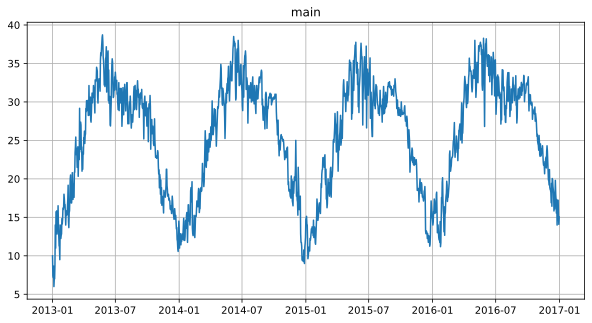

In [84]:
ts.plot()
plt.show();

<!-- Разбиваем данные на тренировочную и тестовую части -->

In [85]:
train_ts, test_ts = ts.train_test_split(
    train_start="2013-01-01",
    train_end="2015-12-31",
    test_start="2016-01-01",
    test_end="2016-12-31",
)

<!-- В библиотеке ETNA реализовано множество самых разных моделей - от классической SARIMAX до нейронных сетей.

Обучим самую простую модель из ETNA - NaiveModel.

Наивная модель предсказывает текущее значение, равное значению ряда несколько периодов назад (lag):

$$y_t = y_{t-lag}$$ -->

In [86]:
HORIZON = 366 # горизонт прогнозирования

from etna.models import NaiveModel, CatBoostMultiSegmentModel, LinearPerSegmentModel, SARIMAXModel

# Fit the model
model1 = NaiveModel(lag=5)

model1.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(future_steps=HORIZON, tail_steps=model1.context_size)

forecast_ts = model1.forecast(future_ts, prediction_size=HORIZON)

In [87]:
from etna.metrics import SMAPE

smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'main': 50.067909843390055}

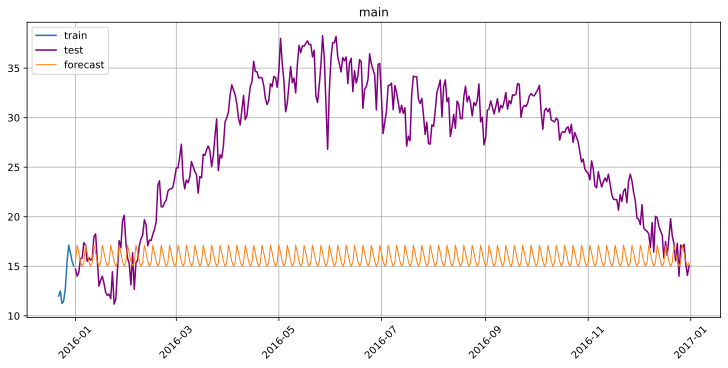

In [88]:
from etna.analysis import plot_forecast

plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=10)
plt.show();

<!-- ### Prophet (от Facebook)

Библиотека Prophet использует аддитивную модель для прогнозирования временных рядов. Аддитивная модель предполагает, что значение временного ряда можно разложить на несколько компонент, таких как тренд, сезонность, праздничные эффекты и остатки.

Модель Prophet выражается следующим уравнением:

$$y_t = g_t + s_t + h_t + e_t,$$

где:

* $g_t$ представляет тренд, моделирующий нелинейное изменение значения временного ряда во времени

* $s_t$ представляет сезонность, учитывающую повторяющиеся паттерны или циклы во временном ряду

* $h_t$ представляет праздничные эффекты, учитывающие влияние праздников и событий на временной ряд

* $e_t$ представляет остатки, которые предполагаются нормально распределенными шумами вокруг модели

Тренд моделируется с использованием гибкой линейной модели, которая может аппроксимировать нелинейные изменения во временном ряду. Сезонность моделируется с помощью фурье-рядов, позволяющих учесть сезонные колебания с различными периодами. Праздничные эффекты моделируются путем добавления индикаторов праздников в модель.

Prophet также автоматически настраивает гиперпараметры модели, такие как гибкость тренда и сезонности, а также влияние праздников. Он также предоставляет возможность пользователю настраивать некоторые параметры, такие как сезонность, шум и другие. -->

In [89]:
from etna.models import ProphetModel

model2 = ProphetModel()

model2.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(HORIZON)
forecast_ts = model2.forecast(future_ts)

20:16:25 - cmdstanpy - INFO - Chain [1] start processing
20:16:25 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
smape(y_true=test_ts, y_pred=forecast_ts)

{'main': 10.462754417789021}

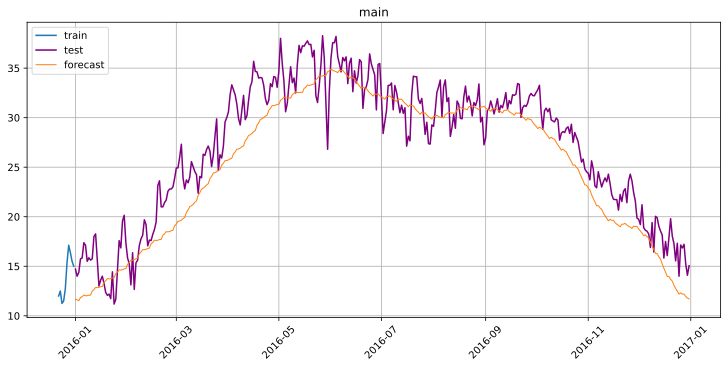

In [91]:
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=10)
plt.show();

<!-- # Pipeline

Для обучения и валидации модели будем использовать сущность `Pipeline`. В целом, использование `Pipeline` позволит ускорить и упростить обучение и тестирование модели. Например, разбиение на тренировочные и тестовые выборки при запуске кросс валидации в таком случае будет производиться автоматически.

`Pipeline` имеет несколько параметров:

* `model` - модель, которая будет обучаться и тестироваться;
* `horizon` - горизонт прогнозирования;
* `transforms` - список преобразований, которые нужно применить к данным.

Ещё одним достоинством использования пайплайна является автоматическое прямое и обратное преобразование данных, следовательно, о согласованности данных можно не беспокоиться. Кросс валидацию на исторических данных можно запустить с помощью метода `backtest`. -->

In [92]:
from etna.pipeline import Pipeline
from etna.metrics import MAE, SMAPE
from etna.transforms import STLTransform, LagTransform, MeanSegmentEncoderTransform

pipe = Pipeline(
    transforms=[
        STLTransform(in_column="target", period=7, model="arima"),
        LagTransform(in_column="target", lags=list(range(3, 10, 1))),
    ],
    model=LinearPerSegmentModel(),
    horizon=3
)

<!-- ## Backtest

Backtest - это кросс-валидация на временных рядах. -->

In [93]:
result = pipe.backtest(
    ts=ts, metrics=[MAE(), SMAPE()], n_folds=5)

metrics, forecast = result['metrics'], result['forecasts']

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

In [94]:
mae_value = metrics["MAE"].mean()

mae_value

1.0949148678996323

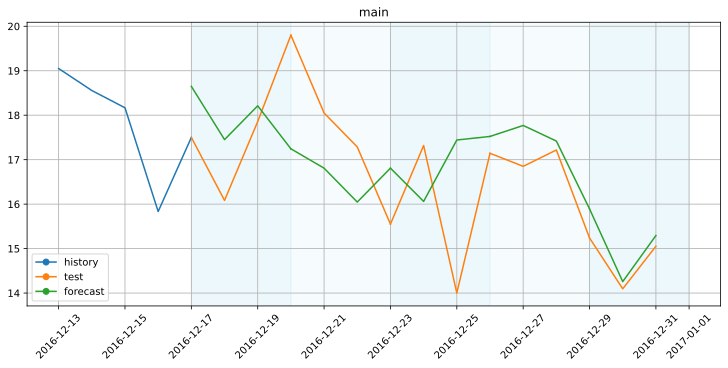

In [95]:
from etna.analysis import plot_backtest

plot_backtest(forecast_ts_list=forecast, ts=ts, history_len=5)
plt.show();

In [96]:
pipe2 = Pipeline(
    transforms=[
        STLTransform(in_column="target", period=7, model="arima"),
        LagTransform(in_column="target", lags=list(range(3, 10, 1))),
    ],
    model=CatBoostMultiSegmentModel(n_estimators=1000, learning_rate=0.01),
    horizon=3
)

In [97]:
result = pipe2.backtest(
    ts=ts, metrics=[MAE(), SMAPE()], n_folds=5)

metrics, forecast = result['metrics'], result['forecasts']

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    9.8s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    9.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

In [98]:
mae_value = metrics["MAE"].mean()

mae_value

0.9906934444248217

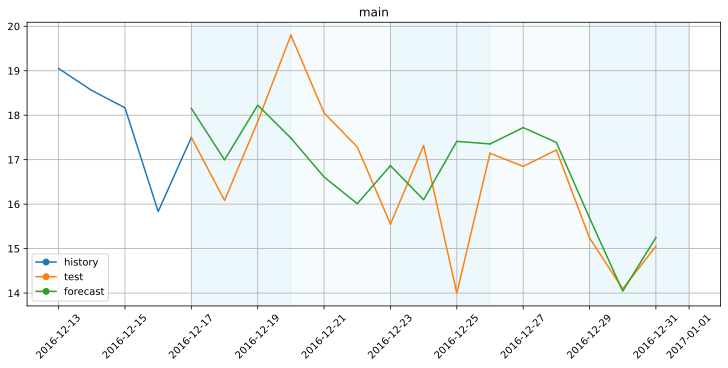

In [99]:
plot_backtest(forecast_ts_list=forecast, ts=ts, history_len=5)
plt.show();

# 4.3 Машинное обучение для временных рядов

План семинара:

1. Обучение моделей
2. ETNA для построения прогнозов
3. Учет экзогенных факторов

In [100]:
# !pip install catboost -q

In [101]:

import warnings
warnings.filterwarnings('ignore')

from catboost import CatBoostRegressor

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm.notebook import tqdm

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

### Предобработка временного ряда  <a name="preprocess">

Возьмем датасет, в котором будет присутвовать переменная, изменяющася во времени. Давайте сегодня попробуем поработать с набором данных по среднесуточной дневной температуре в городе Дели, собранном за несколько лет. Подробнее почитать про датасет можно на [Kaggle](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)

Датасет сразу разбит на две части - train и test, но будем использовать для обучения и валидации моделей только train, оставив test как отложенную выборку для проверки качества.

In [102]:
df = pd.read_csv('data/DailyDelhiClimateTrain.csv')

print(f"Дни с {min(df.date)} по {max(df.date)}, всего {df.date.nunique()} дней.")
df.head()

Дни с 2013-01-01 по 2016-12-31, всего 1461 дней.


date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [103]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

df = df[['date','meantemp']].set_index('date')

df.head()

meantemp
date                 
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000

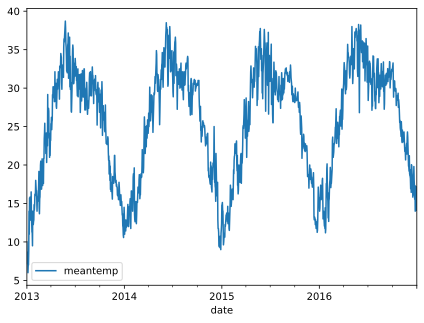

In [104]:
df.plot()
plt.show();

### Генерация признаков <a name="features">

Основные подходы по генерации признаков:

* лаговые признаки (lags) - значения ряда в предыдущие моменты времени

* агрегации (среднее значение ряда по часу, дню, месяцу и так далее; медиана, дисперсия и так далее)


Напишем функцию, которая возвращает словарь, где ключами являются уникальные категории признака cat_feature, а значениями - средние по real_feature.

In [105]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

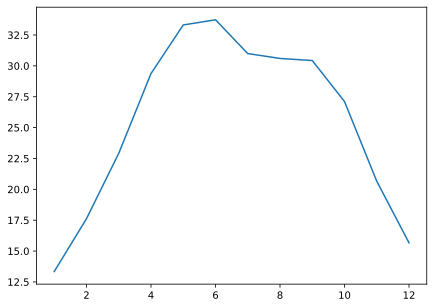

In [106]:
df["month"] = df.index.month

d = code_mean(df, "month", "meantemp")

plt.plot(d.keys(), d.values())
plt.show();

Можно это удобно обернуть в функцию и заменить исходные признаки на их среднее как один из вариантов препроцессинга, а также - добавить значения целевой переменной с разной длинной временного лага.

В функции мы:

1) Разбиваем данные на тренировочную и тестовую части

2) Генерируем лаговые признаки

3) Генерируем агрегированные признаки

In [107]:
def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())

    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data) * (1 - test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data.meantemp.shift(i)

    data["weekday"] = data.index.weekday
    data["week"] = data.index.isocalendar().week
    data["month"] = data.index.month
    data["year"] = data.index.year

    # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
    data["weekday_average"] = list(map(code_mean(data[:test_index], "weekday", "meantemp").get, data.weekday))
    data["week_average"] = list(map(code_mean(data[:test_index], "week", "meantemp").get, data.week))
    data["month_average"] = list(map(code_mean(data[:test_index], "month", "meantemp").get, data.month))
    data["year_average"] = list(map(code_mean(data[:test_index], "year", "meantemp").get, data.year))

    # выкидываем закодированные средними признаки
    data.drop(["weekday", 'month', 'year'], axis=1, inplace=True) 

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["meantemp"], axis=1)
    y_train = data.loc[:test_index]["meantemp"]
    X_test = data.loc[test_index:].drop(["meantemp"], axis=1)
    y_test = data.loc[test_index:]["meantemp"]

    return X_train, X_test, y_train, y_test

In [108]:
X_train, X_test, y_train, y_test = preprocess_data(df, test_size=0.3, lag_start=3, lag_end=10)

X_train.head()

lag_3      lag_4      lag_5     lag_6     lag_7     lag_8      lag_9  \
0   7.000000   7.000000   6.000000  8.666667  7.166667  7.400000  10.000000   
1   8.857143   7.000000   7.000000  6.000000  8.666667  7.166667   7.400000   
2  14.000000   8.857143   7.000000  7.000000  6.000000  8.666667   7.166667   
3  11.000000  14.000000   8.857143  7.000000  7.000000  6.000000   8.666667   
4  15.714286  11.000000  14.000000  8.857143  7.000000  7.000000   6.000000   

   week  weekday_average  week_average  month_average  year_average  
0     2        25.440460     11.925454      12.738377     24.791494  
1     2        25.372054     11.925454      12.738377     24.791494  
2     2        25.331414     11.925454      12.738377     24.791494  
3     2        25.202210     11.925454      12.738377     24.791494  
4     3        25.499234     13.067177      12.738377     24.791494

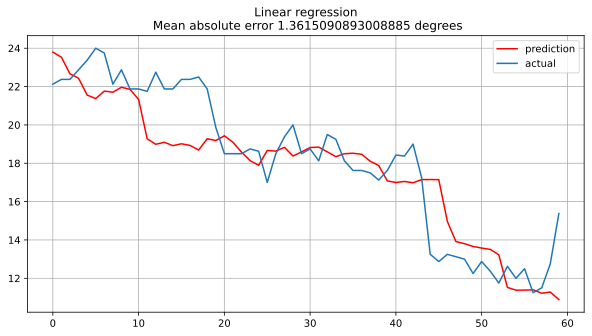

In [109]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees")
plt.show();

In [110]:
coef_table = pd.DataFrame({'features' : list(X_train.columns), 'weights' : lr.coef_})

coef_table.sort_values(by='weights')

features   weights
6             lag_9 -0.041344
4             lag_7 -0.016410
7              week -0.006976
2             lag_5 -0.004427
3             lag_6  0.010263
5             lag_8  0.013256
11     year_average  0.015569
10    month_average  0.020688
1             lag_4  0.056384
0             lag_3  0.215515
9      week_average  0.743883
8   weekday_average  1.122926

## DecisionTree

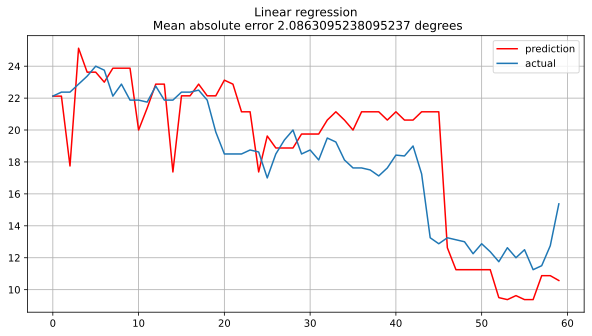

In [111]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
preds = dt.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees")
plt.show();

## RandomForest

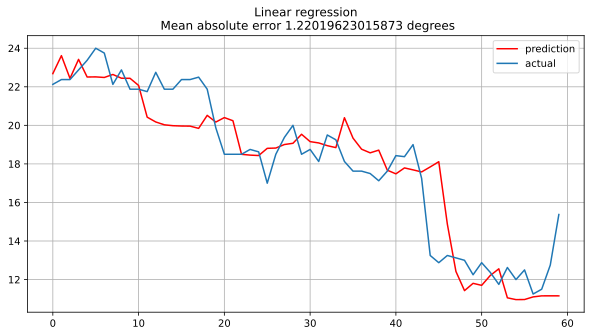

In [112]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees")
plt.show();

## CatBoost

Learning rate set to 0.109355
0:	learn: 6.5569521	total: 11.4ms	remaining: 3.42s
1:	learn: 5.9665685	total: 16.5ms	remaining: 2.46s
2:	learn: 5.4697409	total: 22ms	remaining: 2.18s
3:	learn: 5.0093075	total: 24.4ms	remaining: 1.81s
4:	learn: 4.5865148	total: 28ms	remaining: 1.65s
5:	learn: 4.2269370	total: 31.5ms	remaining: 1.54s
6:	learn: 3.9304873	total: 34.8ms	remaining: 1.46s
7:	learn: 3.6459007	total: 36.7ms	remaining: 1.34s
8:	learn: 3.4089493	total: 40ms	remaining: 1.29s
9:	learn: 3.1963888	total: 42.5ms	remaining: 1.23s
10:	learn: 3.0155031	total: 44.5ms	remaining: 1.17s
11:	learn: 2.8572518	total: 45.9ms	remaining: 1.1s
12:	learn: 2.7216693	total: 47.5ms	remaining: 1.05s
13:	learn: 2.6012322	total: 49.8ms	remaining: 1.02s
14:	learn: 2.4944607	total: 52.1ms	remaining: 989ms
15:	learn: 2.4038542	total: 57.3ms	remaining: 1.02s
16:	learn: 2.3324182	total: 61.6ms	remaining: 1.02s
17:	learn: 2.2718095	total: 63.1ms	remaining: 989ms
18:	learn: 2.2175615	total: 66.1ms	remaining: 978ms

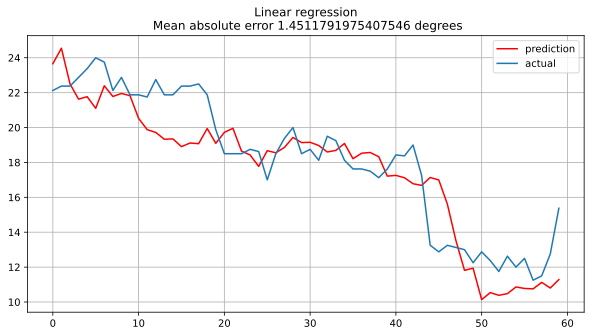

In [113]:
cb = CatBoostRegressor(n_estimators=300)
cb.fit(X_train, y_train)
preds = cb.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)} degrees")
plt.show();

In [114]:
coef_table = pd.DataFrame({'features' : list(X_train.columns), 'weights' : cb.feature_importances_})

coef_table.sort_values(by='weights')

features    weights
8   weekday_average   1.513204
11     year_average   3.464853
7              week   4.105323
4             lag_7   4.636811
2             lag_5   4.893133
5             lag_8   5.254009
6             lag_9   5.465377
10    month_average   6.817442
1             lag_4   7.798108
3             lag_6   9.990535
0             lag_3  13.532089
9      week_average  32.529114

## Библиотеки для работы с временными рядами
    
Для работы с временными рядами существует несколько хороших библиотек. Мы немного посмотрим на библиотеку ETNA, но есть и другие.
    
Среди них: библиотека от Facebook [Prophet](https://github.com/facebook/prophet), [tsfresh](https://github.com/blue-yonder/tsfresh), [darts](https://github.com/unit8co/darts) и другие (можно посмотреть на github).

Источники:

1. Пост на Хабре от ODS https://habr.com/ru/company/ods/blog/327242/
2. Онлайн-учебник курса по продвинутому статистическому прогнозированию университета Duke  https://people.duke.edu/~rnau/411home.htm

# ETNA (от Тинькофф)

Первая общедоступная версия библиотеки появилась в сентябре 2021 г.

In [115]:
# !pip install etna -q

In [116]:
import pandas as pd

df = pd.read_csv('data/DailyDelhiClimateTrain.csv')

df = df[['date','meantemp']]

Приведем данные к формату, с которым работает ETNA:

* колонка `timestamp` - время в формате datetime
* колонка `target` - целевая переменная (прогнозируемый ряд)
* колонка `segment` - `main` в случае, если целевая переменная - это один ряд

In [117]:
df["timestamp"] = pd.to_datetime(df["date"])
df["target"] = df["meantemp"]
df.drop(columns=["date", "meantemp"], inplace=True)
df["segment"] = "main"

df.head()

timestamp     target segment
0 2013-01-01  10.000000    main
1 2013-01-02   7.400000    main
2 2013-01-03   7.166667    main
3 2013-01-04   8.666667    main
4 2013-01-05   6.000000    main

В ETNA есть специальный класс для работы с временными рядами - TSDataset, приведем наши данные к этому формату.

In [118]:
from etna.datasets.tsdataset import TSDataset

df = TSDataset.to_dataset(df)
df.head()

segment          main
feature        target
timestamp            
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000

Укажем временной шаг (дни).

In [119]:
ts = TSDataset(df, freq="D")

ts.head()

segment          main
feature        target
timestamp            
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000

In [120]:
ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 1
num_exogs: 0
num_regressors: 0
num_known_future: 0
freq: D
end_timestamp: 2016-12-31 00:00:00
         start_timestamp  length  num_missing
segments                                     
main          2013-01-01    1461            0


In [121]:
ts.describe()

start_timestamp end_timestamp  length  num_missing  num_segments  \
segments                                                                    
main          2013-01-01    2016-12-31    1461            0             1   

          num_exogs  num_regressors  num_known_future freq  
segments                                                    
main              0               0                 0    D

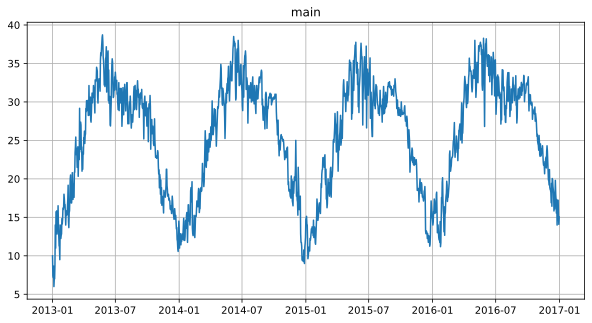

In [122]:
ts.plot()
plt.show();

Разбиваем данные на тренировочную и тестовую части

In [123]:
train_ts, test_ts = ts.train_test_split(
    train_start="2013-01-01",
    train_end="2015-12-31",
    test_start="2016-01-01",
    test_end="2016-12-31",
)

В библиотеке ETNA реализовано множество самых разных моделей - от классической SARIMAX до нейронных сетей.

Обучим самую простую модель из ETNA - NaiveModel.

Наивная модель предсказывает текущее значение, равное значению ряда несколько периодов назад (lag):

$$y_t = y_{t-lag}$$

In [124]:
HORIZON = 366 # горизонт прогнозирования

from etna.models import NaiveModel, CatBoostMultiSegmentModel, LinearPerSegmentModel, SARIMAXModel

# Fit the model
model1 = NaiveModel(lag=5)

model1.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(future_steps=HORIZON, tail_steps=model1.context_size)

forecast_ts = model1.forecast(future_ts, prediction_size=HORIZON)

In [125]:
from etna.metrics import SMAPE

smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'main': 50.067909843390055}

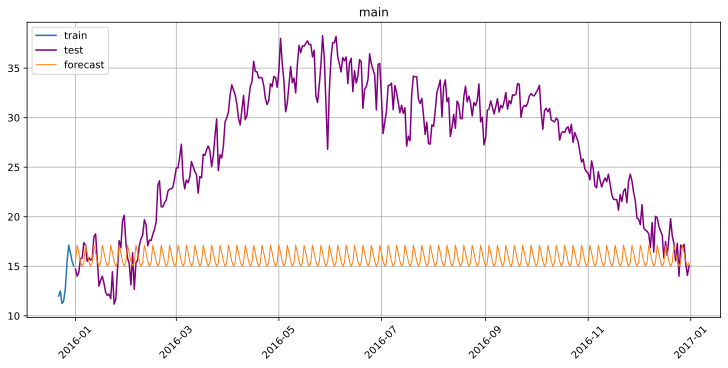

In [126]:
from etna.analysis import plot_forecast

plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=10)
plt.show();

### Prophet (от Facebook)

Библиотека Prophet использует аддитивную модель для прогнозирования временных рядов. Аддитивная модель предполагает, что значение временного ряда можно разложить на несколько компонент, таких как тренд, сезонность, праздничные эффекты и остатки.

Модель Prophet выражается следующим уравнением:

$$y_t = g_t + s_t + h_t + e_t,$$

где:

* $g_t$ представляет тренд, моделирующий нелинейное изменение значения временного ряда во времени

* $s_t$ представляет сезонность, учитывающую повторяющиеся паттерны или циклы во временном ряду

* $h_t$ представляет праздничные эффекты, учитывающие влияние праздников и событий на временной ряд

* $e_t$ представляет остатки, которые предполагаются нормально распределенными шумами вокруг модели

Тренд моделируется с использованием гибкой линейной модели, которая может аппроксимировать нелинейные изменения во временном ряду. Сезонность моделируется с помощью фурье-рядов, позволяющих учесть сезонные колебания с различными периодами. Праздничные эффекты моделируются путем добавления индикаторов праздников в модель.

Prophet также автоматически настраивает гиперпараметры модели, такие как гибкость тренда и сезонности, а также влияние праздников. Он также предоставляет возможность пользователю настраивать некоторые параметры, такие как сезонность, шум и другие.

In [127]:
from etna.models import ProphetModel

model2 = ProphetModel()

model2.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(HORIZON)
forecast_ts = model2.forecast(future_ts)

20:16:46 - cmdstanpy - INFO - Chain [1] start processing
20:16:46 - cmdstanpy - INFO - Chain [1] done processing


In [128]:
smape(y_true=test_ts, y_pred=forecast_ts)

{'main': 10.462754417789021}

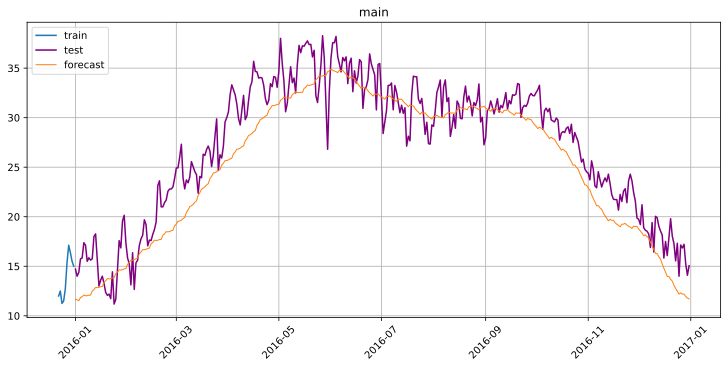

In [129]:
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=10)
plt.show();

# Pipeline

Для обучения и валидации модели будем использовать сущность `Pipeline`. В целом, использование `Pipeline` позволит ускорить и упростить обучение и тестирование модели. Например, разбиение на тренировочные и тестовые выборки при запуске кросс валидации в таком случае будет производиться автоматически.

`Pipeline` имеет несколько параметров:

* `model` - модель, которая будет обучаться и тестироваться;
* `horizon` - горизонт прогнозирования;
* `transforms` - список преобразований, которые нужно применить к данным.

Ещё одним достоинством использования пайплайна является автоматическое прямое и обратное преобразование данных, следовательно, о согласованности данных можно не беспокоиться. Кросс валидацию на исторических данных можно запустить с помощью метода `backtest`.

In [130]:
from etna.pipeline import Pipeline
from etna.metrics import MAE, SMAPE
from etna.transforms import STLTransform, LagTransform, MeanSegmentEncoderTransform

pipe = Pipeline(
    transforms=[
        STLTransform(in_column="target", period=7, model="arima"),
        LagTransform(in_column="target", lags=list(range(3, 10, 1))),
    ],
    model=LinearPerSegmentModel(),
    horizon=3
)

## Backtest

Backtest - это кросс-валидация на временных рядах.

In [131]:
result = pipe.backtest(
    ts=ts, metrics=[MAE(), SMAPE()], n_folds=5)

metrics, forecast = result['metrics'], result['forecasts']

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

In [132]:
mae_value = metrics["MAE"].mean()

mae_value

1.0949148678996323

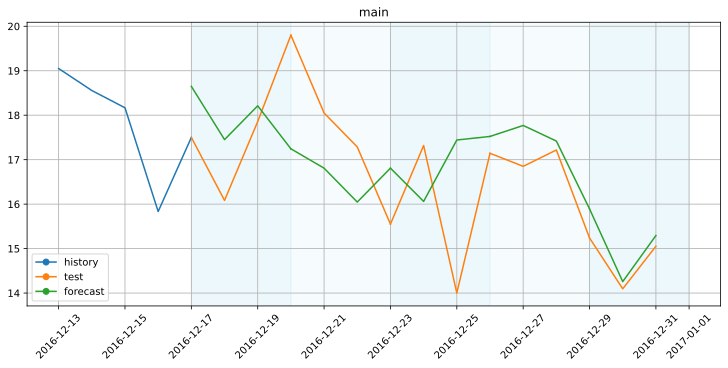

In [133]:
from etna.analysis import plot_backtest

plot_backtest(forecast_ts_list=forecast, ts=ts, history_len=5)
plt.show();

In [134]:
pipe2 = Pipeline(
    transforms=[
        STLTransform(in_column="target", period=7, model="arima"),
        LagTransform(in_column="target", lags=list(range(3, 10, 1))),
    ],
    model=CatBoostMultiSegmentModel(n_estimators=1000, learning_rate=0.01),
    horizon=3
)

In [135]:
result = pipe2.backtest(
    ts=ts, metrics=[MAE(), SMAPE()], n_folds=5)

metrics, forecast = result['metrics'], result['forecasts']

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   10.7s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   10.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

In [136]:
mae_value = metrics["MAE"].mean()

mae_value

0.9906934444248217

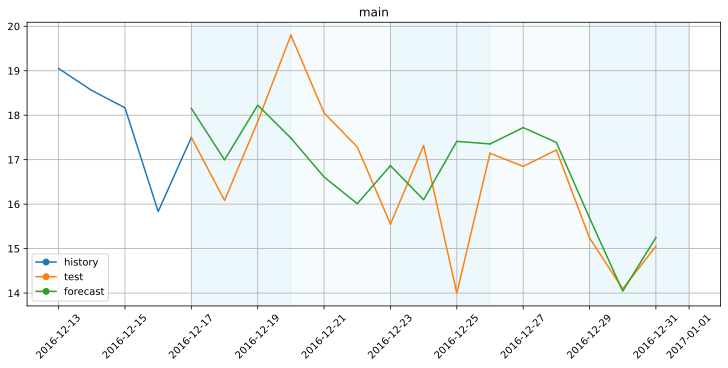

In [137]:
plot_backtest(forecast_ts_list=forecast, ts=ts, history_len=5)
plt.show();

Примеры ноутбуков с использованием ETNA:

* [tutorial из документации](https://github.com/tinkoff-ai/etna/blob/master/examples/get_started.ipynb)

* [семинар с курса "Прикладные задачи машинного обучения" в ВШЭ](https://github.com/hse-ds/iad-applied-ds/blob/master/2023/seminars/sem07_ts2/sem07_ts2.ipynb)

## Учет экзогенных факторов

In [138]:
df = pd.read_csv('data/DailyDelhiClimateTrain2.csv')

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

df.head()

date   meantemp   humidity  wind_speed  meanpressure
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [139]:
df = df[['date','meantemp','meanpressure']].set_index('date')

In [140]:
df.head()

meantemp  meanpressure
date                               
2013-01-01  10.000000   1015.666667
2013-01-02   7.400000   1017.800000
2013-01-03   7.166667   1018.666667
2013-01-04   8.666667   1017.166667
2013-01-05   6.000000   1016.500000

In [141]:
def preprocess_data_exog(data, lag_start=5, lag_end=20, test_size=0.15):

    exog = "meanpressure"

    data = pd.DataFrame(data.copy())

    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data) * (1 - test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data.meantemp.shift(i)
        data[f"lag_exog_{i}"] = data[exog].shift(i)

    data["weekday"] = data.index.weekday
    data["week"] = data.index.isocalendar().week
    data["month"] = data.index.month
    data["year"] = data.index.year

    # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
    data["weekday_average"] = list(map(code_mean(data[:test_index], "weekday", "meantemp").get, data.weekday))
    data["week_average"] = list(map(code_mean(data[:test_index], "week", "meantemp").get, data.week))
    data["month_average"] = list(map(code_mean(data[:test_index], "month", "meantemp").get, data.month))
    data["year_average"] = list(map(code_mean(data[:test_index], "year", "meantemp").get, data.year))

    data["weekday_average_exog"] = list(map(code_mean(data[:test_index], "weekday", exog).get, data.weekday))
    data["week_average_exog"] = list(map(code_mean(data[:test_index], "week", exog).get, data.week))
    data["month_average_exog"] = list(map(code_mean(data[:test_index], "month", exog).get, data.month))
    data["year_average_exog"] = list(map(code_mean(data[:test_index], "year", exog).get, data.year))

    # выкидываем закодированные средними признаки
    data.drop(["weekday", "week", "month", "year", exog], axis=1, inplace=True)

    data = data.dropna()
    data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["meantemp"], axis=1)
    y_train = data.loc[:test_index]["meantemp"]
    X_test = data.loc[test_index:].drop(["meantemp"], axis=1)
    y_test = data.loc[test_index:]["meantemp"]

    return X_train, X_test, y_train, y_test

In [142]:
X_train_big, X_test_big, y_train, y_test = preprocess_data_exog(df, test_size=0.3, lag_start=3, lag_end=10)

X_train_big.head()

lag_3   lag_exog_3      lag_4   lag_exog_4      lag_5   lag_exog_5  \
0   7.000000  1020.000000   7.000000  1018.000000   6.000000  1016.500000   
1   8.857143  1018.714286   7.000000  1020.000000   7.000000  1018.000000   
2  14.000000  1017.000000   8.857143  1018.714286   7.000000  1020.000000   
3  11.000000  1015.666667  14.000000  1017.000000   8.857143  1018.714286   
4  15.714286  1016.142857  11.000000  1015.666667  14.000000  1017.000000   

      lag_6   lag_exog_6     lag_7   lag_exog_7  ...      lag_9   lag_exog_9  \
0  8.666667  1017.166667  7.166667  1018.666667  ...  10.000000  1015.666667   
1  6.000000  1016.500000  8.666667  1017.166667  ...   7.400000  1017.800000   
2  7.000000  1018.000000  6.000000  1016.500000  ...   7.166667  1018.666667   
3  7.000000  1020.000000  7.000000  1018.000000  ...   8.666667  1017.166667   
4  8.857143  1018.714286  7.000000  1020.000000  ...   6.000000  1016.500000   

   weekday_average  week_average  month_average  year_average  \
0        25.440460     11.925454      12.738377     24.791494   
1        25.372054     11.925454      12.738377     24.791494   
2        25.331414     11.925454      12.738377     24.791494   
3        25.202210     11.925454      12.738377     24.791494   
4        25.499234     13.067177      12.738377     24.791494   

   weekday_average_exog  week_average_exog  month_average_exog  \
0           1007.715550        1017.573980         1018.552483   
1           1007.542990        1017.573980         1018.552483   
2           1007.585645        1017.573980         1018.552483   
3           1007.803264        1017.573980         1018.552483   
4           1007.899013        1018.442744         1018.552483   

   year_average_exog  
0        1007.642172  
1        1007.642172  
2        1007.642172  
3        1007.642172  
4        1007.642172  

[5 rows x 22 columns]

Заново обучим линейную регрессию на исходных данных (чтобы затем сравнить)

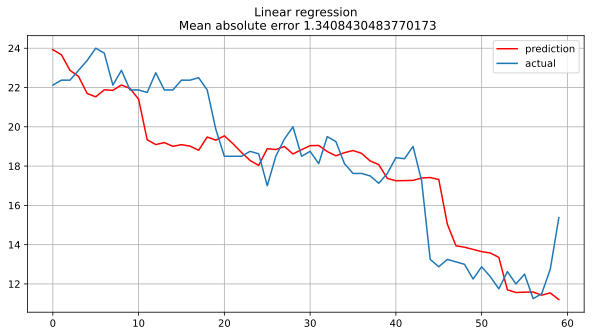

In [143]:
lr = LinearRegression()
lr.fit(X_train_big, y_train)
preds = lr.predict(X_test_big)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)}")
plt.show();

Теперь обучим модель на данных с учетом экзогенных факторов

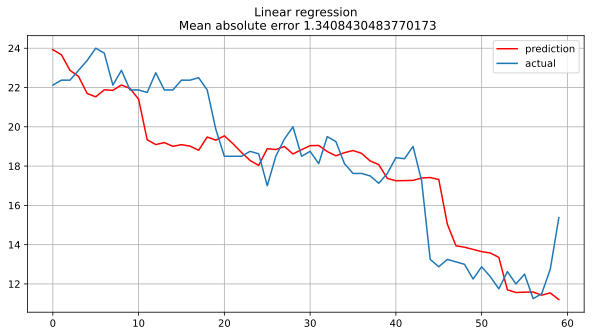

In [144]:
lr = LinearRegression()
lr.fit(X_train_big, y_train)
preds = lr.predict(X_test_big)

plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {mean_absolute_error(preds, y_test)}")
plt.show();

In [145]:
coef_table = pd.DataFrame({'features' : list(X_train_big.columns), 'weights' : lr.coef_})

coef_table.sort_values(by='weights')

features   weights
12                 lag_9 -0.052149
19     week_average_exog -0.044474
7             lag_exog_6 -0.019726
8                  lag_7 -0.016592
3             lag_exog_4 -0.006093
13            lag_exog_9 -0.002883
4                  lag_5  0.003910
6                  lag_6  0.004960
20    month_average_exog  0.005108
9             lag_exog_7  0.007471
11            lag_exog_8  0.010108
10                 lag_8  0.013476
1             lag_exog_3  0.021729
5             lag_exog_5  0.030651
16         month_average  0.031276
17          year_average  0.051289
2                  lag_4  0.055325
18  weekday_average_exog  0.065935
21     year_average_exog  0.088747
0                  lag_3  0.221381
15          week_average  0.734624
14       weekday_average  1.103748

# 4.4  Домашнее задание. Прогнозирование временных рядов при помощи машинного обучения

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Предобработка временного ряда

Импорт библиотек

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [147]:
# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("data/market_arrivals_ind.csv")

df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

Оставим только целевой ряд (`quantity`)

In [148]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

ts.head()

quantity
date             
2004-01    227832
2004-02    225133
2004-03    221952
2004-04    185150
2004-05    137390

Посмотрим как ведет себя временной ряд

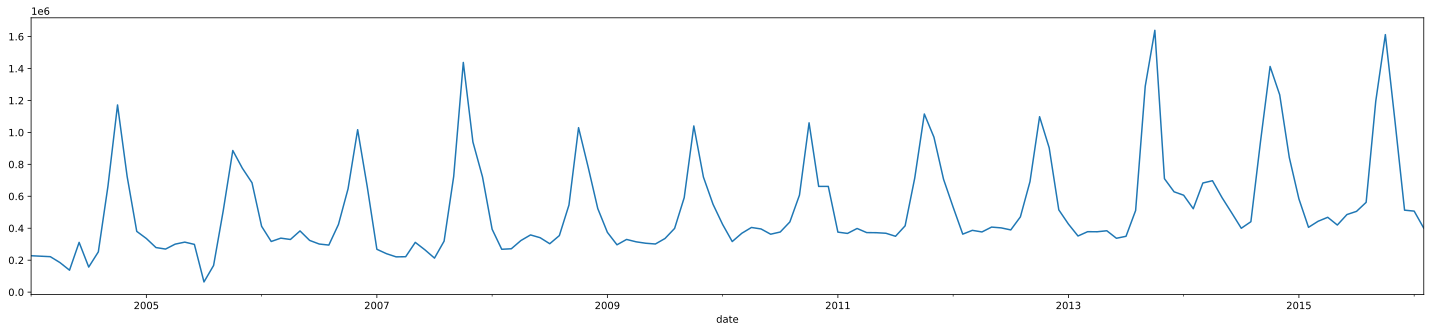

In [149]:
ts.quantity.plot(figsize=(25,5))
plt.show();

## Машинное обучение для прогнозирования временных рядов

## Задание

Извлеките первые 7 лаговых признаков из ряда (лаг на 1, 2 ... 7 месяцев).

Чему равно первое (самое старое) известное значение лага 4 периода назад (lag_4)? Ответ округлите до целого числа.

In [150]:
# your code here
for i in range(1, 8):
    ts[f'lag_{i}'] = ts['quantity'].shift(i)

In [151]:
ts.head()

quantity     lag_1     lag_2     lag_3     lag_4  lag_5  lag_6  lag_7
date                                                                          
2004-01    227832       NaN       NaN       NaN       NaN    NaN    NaN    NaN
2004-02    225133  227832.0       NaN       NaN       NaN    NaN    NaN    NaN
2004-03    221952  225133.0  227832.0       NaN       NaN    NaN    NaN    NaN
2004-04    185150  221952.0  225133.0  227832.0       NaN    NaN    NaN    NaN
2004-05    137390  185150.0  221952.0  225133.0  227832.0    NaN    NaN    NaN

Выкиньте строчки с пропущенными значениями.

In [152]:
# your code here
ts = ts.dropna()

### Разбиение на train и test для временных рядов

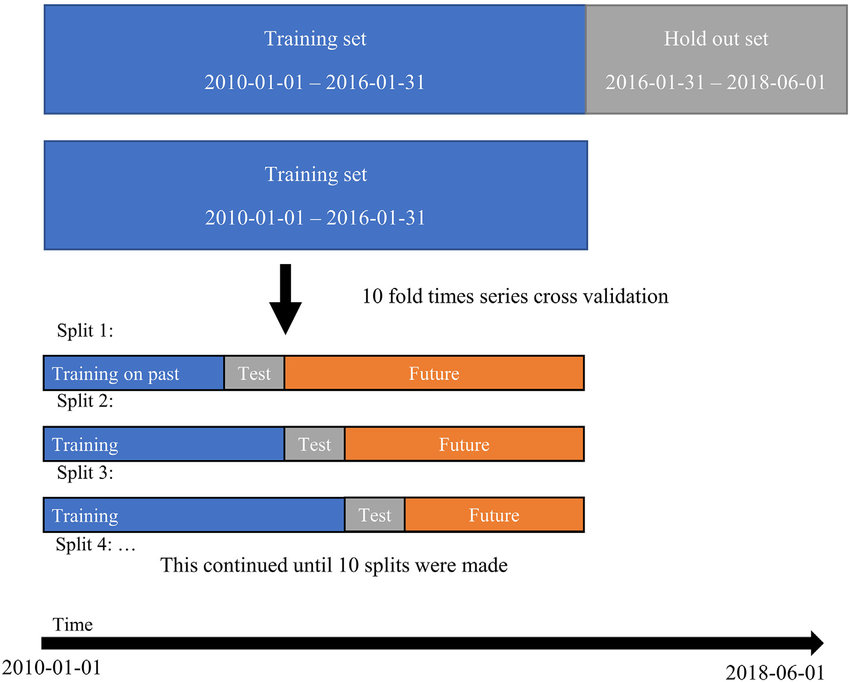

## Задание

Разбейте данные (quantity) на train и test.

train - первые 85% данных

test - следующие 15% данных

Сколько измерений попало в тестовую часть?

In [153]:
ts.head()

quantity      lag_1      lag_2     lag_3     lag_4     lag_5  \
date                                                                    
2004-08    251984   157022.0   311445.0  137390.0  185150.0  221952.0   
2004-09    662382   251984.0   157022.0  311445.0  137390.0  185150.0   
2004-10   1171846   662382.0   251984.0  157022.0  311445.0  137390.0   
2004-11    724140  1171846.0   662382.0  251984.0  157022.0  311445.0   
2004-12    380379   724140.0  1171846.0  662382.0  251984.0  157022.0   

            lag_6     lag_7  
date                         
2004-08  225133.0  227832.0  
2004-09  221952.0  225133.0  
2004-10  185150.0  221952.0  
2004-11  137390.0  185150.0  
2004-12  311445.0  137390.0

In [154]:
# Train, Test = train_test_split(ts, test_size=0.15, shuffle=False)
# Test.shape

split_index = int(0.85*len(ts))

Train = ts.iloc[:split_index]
Test = ts.iloc[split_index:]

Test.shape

(21, 8)

## Задание

Разбейте тренировочные и тестовые данные на матрицы объект-признак `X_train`, `X_test` и векторы с целевой переменной `y_train`, `y_test`.

Чему равно среднее значение `y_test`? Ответ округлите до целого числа

In [155]:
Train.head()

quantity      lag_1      lag_2     lag_3     lag_4     lag_5  \
date                                                                    
2004-08    251984   157022.0   311445.0  137390.0  185150.0  221952.0   
2004-09    662382   251984.0   157022.0  311445.0  137390.0  185150.0   
2004-10   1171846   662382.0   251984.0  157022.0  311445.0  137390.0   
2004-11    724140  1171846.0   662382.0  251984.0  157022.0  311445.0   
2004-12    380379   724140.0  1171846.0  662382.0  251984.0  157022.0   

            lag_6     lag_7  
date                         
2004-08  225133.0  227832.0  
2004-09  221952.0  225133.0  
2004-10  185150.0  221952.0  
2004-11  137390.0  185150.0  
2004-12  311445.0  137390.0

In [156]:
# your code here

X_train, y_train = Train.drop('quantity', axis=1), Train['quantity']
X_test, y_test = Test.drop('quantity', axis=1), Test['quantity']

In [157]:
y_test.mean().round()

711637.0

## Прогнозирование временных рядов

Обратите внимание, что в функции мы сами по индексу разбили датасет на обучающую и валидационную выборку для обучения моделей. Мы не можем воспользовать train_test_split, так как нам необходимо сохранять хронологию в деление выборки на части, т.е. случайное сэмплирование наблюдений нам не подойдет, в частности, т.к. мы хотим выучить тренд в данных.

## Задание

Обучите линейную регрессию на тренировочных данных и посчитайте $R^2$ на тесте.

Ответ округлите до сотых.

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# your code here

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [159]:
r2 = r2_score(y_test, y_pred)
round(r2, 2)

0.5

## Агрегированные признаки

Используем функцию, которая возвращает словарь, где ключами являются уникальные категории признака `cat_feature`, а значениями - средние по `real_feature`.

In [160]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

## Задание

Создайте колонку `month`, содержащую месяц (из даты).

Вычислите среднее значение целевой переменной по месяцам (по всем обучающим данным до разбиения на train и test).

В какой месяц года среднее количество проданного товара максимально? В ответе укажите номер месяца.

In [161]:
ts.head()

quantity      lag_1      lag_2     lag_3     lag_4     lag_5  \
date                                                                    
2004-08    251984   157022.0   311445.0  137390.0  185150.0  221952.0   
2004-09    662382   251984.0   157022.0  311445.0  137390.0  185150.0   
2004-10   1171846   662382.0   251984.0  157022.0  311445.0  137390.0   
2004-11    724140  1171846.0   662382.0  251984.0  157022.0  311445.0   
2004-12    380379   724140.0  1171846.0  662382.0  251984.0  157022.0   

            lag_6     lag_7  
date                         
2004-08  225133.0  227832.0  
2004-09  221952.0  225133.0  
2004-10  185150.0  221952.0  
2004-11  137390.0  185150.0  
2004-12  311445.0  137390.0

In [162]:
# ts['month'] = list(map(code_mean(ts, ts.index.month, 'quantity').get, ts.index.month))
# ts.head()

In [163]:
ts['month'] = ts.index.month
ts['month_average'] = list(map(code_mean(ts, "month", "quantity").get, ts['month']))

ts.head()

quantity      lag_1      lag_2     lag_3     lag_4     lag_5  \
date                                                                    
2004-08    251984   157022.0   311445.0  137390.0  185150.0  221952.0   
2004-09    662382   251984.0   157022.0  311445.0  137390.0  185150.0   
2004-10   1171846   662382.0   251984.0  157022.0  311445.0  137390.0   
2004-11    724140  1171846.0   662382.0  251984.0  157022.0  311445.0   
2004-12    380379   724140.0  1171846.0  662382.0  251984.0  157022.0   

            lag_6     lag_7  month  month_average  
date                                               
2004-08  225133.0  227832.0      8   3.854567e+05  
2004-09  221952.0  225133.0      9   7.411839e+05  
2004-10  185150.0  221952.0     10   1.179205e+06  
2004-11  137390.0  185150.0     11   8.760303e+05  
2004-12  311445.0  137390.0     12   6.155788e+05

In [164]:
ts['month_average'].idxmax().month

10

Далее будем использовать функцию preprocess_data.

В функции мы:

1) Разбиваем данные на тренировочную и тестовую части

2) Генерируем лаговые признаки

3) Генерируем агрегированные признаки

In [165]:
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [166]:
index_cut = int(0.815*len(ts))

In [167]:
def preprocess_data(data, lag_start, lag_end, index_cut=index_cut):

    data = pd.DataFrame(data.copy())

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data['quantity'].shift(i)

    data = data.dropna()

    data["month"] = data.index.month

    # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
    data["month_average"] = list(map(code_mean(data.iloc[:index_cut], "month", "quantity").get, data.month))

    # выкидываем закодированные средними признаки
    data.drop(["month"], axis=1, inplace=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.iloc[:index_cut].drop(["quantity"], axis=1)
    y_train = data.iloc[:index_cut]["quantity"]
    X_test = data.iloc[index_cut:].drop(["quantity"], axis=1)
    y_test = data.iloc[index_cut:]["quantity"]

    return X_train, X_test, y_train, y_test

In [168]:
X_train, X_test, y_train, y_test = preprocess_data(ts, lag_start=1, lag_end=8)

X_train.shape, X_test.shape

((118, 8), (21, 8))

## Задание

Обучите линейную регрессию на подготовленных тренировочных данных и выведите $R^2$ на тесте.

Ответ округлите до сотых.

In [169]:
# your code here

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [170]:
r2 = r2_score(y_test, y_pred)
round(r2, 2)

0.74

## Задание

Заново разбейте данные на train и test, используя `preprocess_data` с лагами от 1 до 12 не включительно.

Обучите линейную регрессию. Чему теперь равен $R^2$? Ответ округлите до сотых.

In [171]:
# your code here

X_train, X_test, y_train, y_test = preprocess_data(ts, lag_start=1, lag_end=12)

X_train.shape, X_test.shape

((118, 12), (17, 12))

In [172]:
# your code here

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [173]:
r2 = r2_score(y_test, y_pred)
round(r2, 2)

0.86

## Задание

Обучите CatBoostRegressor с гиперпараметрами по умолчанию на тех же данных, что и линейную регрессию из предыдущего задания. Чему теперь равен $R^2$? Ответ округлите до десятых.

In [174]:
# !pip install catboost -q

In [175]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(verbose=0)
cb.fit(X_train, y_train)

y_pred = cb.predict(X_test)

In [176]:
r2 = r2_score(y_test, y_pred)
round(r2, 1)

0.6

## Бонусное задание (не проверяется тестами)

Попробуйте использовать в качестве экзогенного фактора `priceMod` из исходных данных.

Также пробуйте любые модели регрессии и любые наборы гиперпараметров.

Единственное требование: в тесте - те же 21 измерений.

Какого наилучшего значения $R^2$ на тесте вам удалось добиться?

In [177]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
round(r2, 2)

0.9

# 5.1 Простое экспоненциальное сглаживание

Модель $$\tilde y_{t+d} = l,$$
где
$$\tilde y_{t+1} = \alpha y_t + (1-\alpha)\tilde y_t$$

### Пример 1: [из документации](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#The-Internals)

In [178]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline

data = [
    446.6565,
    454.4733,
    455.663,
    423.6322,
    456.2713,
    440.5881,
    425.3325,
    485.1494,
    506.0482,
    526.792,
    514.2689,
    494.211,
]
index = pd.date_range(start="1996", end="2008", freq="A")
oildata = pd.Series(data, index)

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


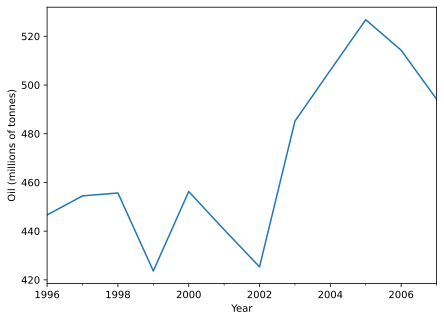

In [179]:
ax = oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")
plt.show();

Попробуем три варианта простого экспоненциального сглаживания:

1) c $\alpha = 0.2$

2) с $\alpha = 0.6$

3) определим $\alpha$ автоматически (рекомендованный вариант)

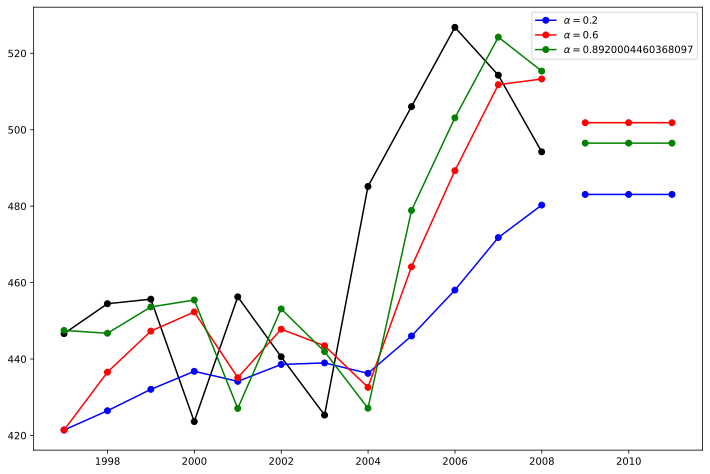

In [180]:
fit1 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")

fit2 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")

fit3 = SimpleExpSmoothing(oildata, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
plt.show();

## Пример 2: временной ряд из ритейла

In [181]:
rt_df = pd.read_csv('data/retail.csv', parse_dates=['Date']).set_index('Date')

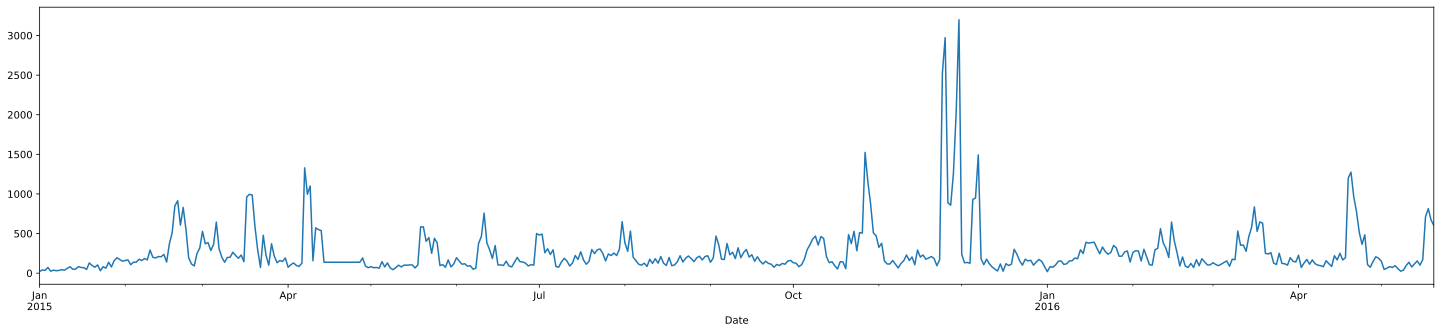

In [182]:
ts = rt_df[(rt_df['Store_id']==1) & (rt_df['SKU_id']==1)]['Demand'].iloc[:-30]

ts.plot(figsize=(25,5))
plt.show();

In [183]:
train = ts.iloc[:-100]
test = ts.iloc[-100:]

In [184]:
fit3 = SimpleExpSmoothing(train, initialization_method="estimated").fit()

fcast3 = fit3.forecast(100).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

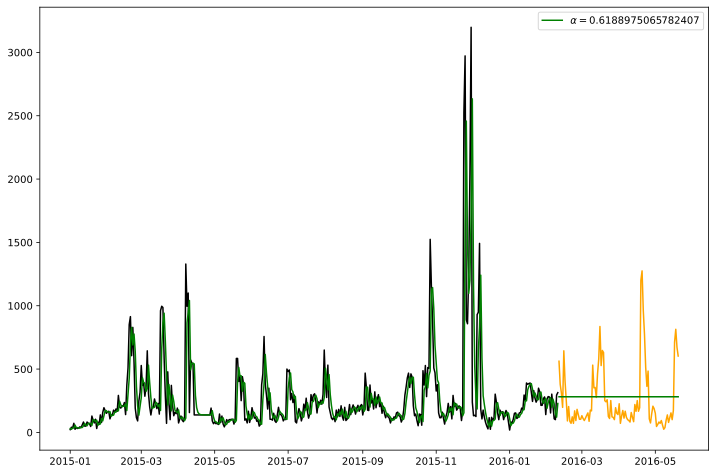

In [185]:
plt.figure(figsize=(12, 8))
plt.plot(train, color="black")
plt.plot(test, color="orange")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, color="green")
plt.legend([line3], [fcast3.name])
plt.show();

# 5.1 Двойное и тройное экспоненциальное сглаживание

### Пример [из документации](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#The-Internals)

In [186]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline

data = [
    17.5534,
    21.86,
    23.8866,
    26.9293,
    26.8885,
    28.8314,
    30.0751,
    30.9535,
    30.1857,
    31.5797,
    32.5776,
    33.4774,
    39.0216,
    41.3864,
    41.5966,
]
index = pd.date_range(start="1990", end="2005", freq="A")
air = pd.Series(data, index)

data = [
    263.9177,
    268.3072,
    260.6626,
    266.6394,
    277.5158,
    283.834,
    290.309,
    292.4742,
    300.8307,
    309.2867,
    318.3311,
    329.3724,
    338.884,
    339.2441,
    328.6006,
    314.2554,
    314.4597,
    321.4138,
    329.7893,
    346.3852,
    352.2979,
    348.3705,
    417.5629,
    417.1236,
    417.7495,
    412.2339,
    411.9468,
    394.6971,
    401.4993,
    408.2705,
    414.2428,
]
index = pd.date_range(start="1970", end="2001", freq="A")
livestock2 = pd.Series(data, index)

data = [407.9979, 403.4608, 413.8249, 428.105, 445.3387, 452.9942, 455.7402]
index = pd.date_range(start="2001", end="2008", freq="A")
livestock3 = pd.Series(data, index)

data = [
    41.7275,
    24.0418,
    32.3281,
    37.3287,
    46.2132,
    29.3463,
    36.4829,
    42.9777,
    48.9015,
    31.1802,
    37.7179,
    40.4202,
    51.2069,
    31.8872,
    40.9783,
    43.7725,
    55.5586,
    33.8509,
    42.0764,
    45.6423,
    59.7668,
    35.1919,
    44.3197,
    47.9137,
]
index = pd.date_range(start="2005", end="2010-Q4", freq="QS-OCT")
aust = pd.Series(data, index)

### Двойное экспоненциальное сглаживание (модель Хольта с трендом)

Модель (с аддитивным трендом)
$$\tilde y_{t+d} = \tilde l_t + \tilde b_t\cdot d,$$
где
$$\tilde l_t = \alpha y_t + (1-\alpha)(\tilde l_{t-1}+\tilde b_{t-1}),$$
$$\tilde b_t = \beta(\tilde l_t - \tilde l_{t-1}) + (1-\beta)\tilde b_{t-1}.$$

Также в библиотеке реализована модель с экспоненциальным трендом.

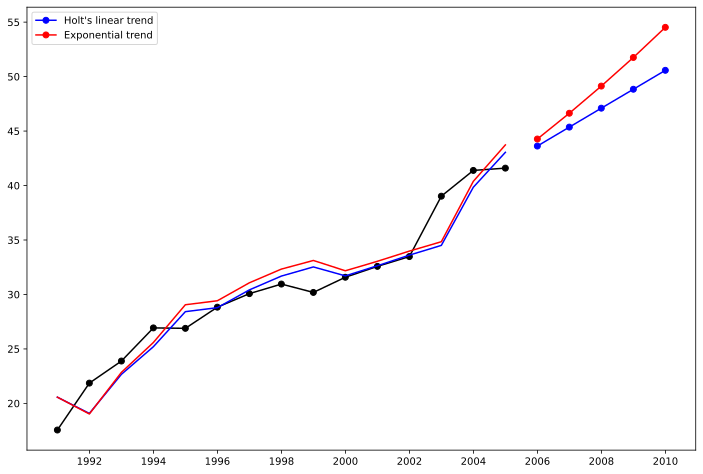

In [187]:
fit1 = Holt(air, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")

fit2 = Holt(air, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")

plt.figure(figsize=(12, 8))
plt.plot(air, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.legend([line1, line2], [fcast1.name, fcast2.name])
plt.show();

### Тройное экспоненциальное сглаживание (модель Хольта-Винтерса с трендом и сезонностью)

Рассмотрим две модели:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

Модель (с аддитивным трендом и сезонностью периода $p$) имеет вид
$$\tilde y_{t+d} = \tilde l_t + \tilde b_t\cdot d + \tilde s_{t+d mod(p)-p},$$
где
$$\tilde l_t = \alpha(y_t-\tilde s_{t-p}) + (1-\alpha)(\tilde l_{t-1}+\tilde b_{t-1}),$$
$$\tilde b_t = \beta(\tilde l_t - \tilde l_{t-1}) + (1-\beta)\tilde b_{t-1},$$
$$\tilde s_t = \gamma(y_t-\tilde l_t) + (1-\gamma)\tilde s_{t-p}$$

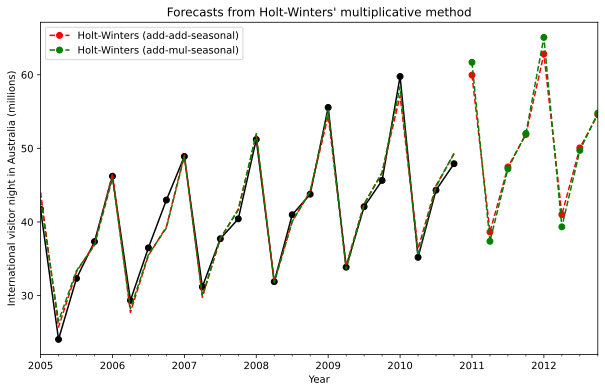

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


In [188]:
fit1 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit2 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)

ax = aust.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)

ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")

fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")

fit1.forecast(8).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()
print(
    "Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality."
)

In [189]:
results

Empty DataFrame
Columns: []
Index: [$\alpha$, $\beta$, $\phi$, $\gamma$, $l_0$, $b_0$, SSE]

# 5.2 Затухающий тренд (damped trend)

### Пример [из документации](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#The-Internals)

In [190]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline

data = [407.9979, 403.4608, 413.8249, 428.105, 445.3387, 452.9942, 455.7402]
index = pd.date_range(start="2001", end="2008", freq="A")
livestock3 = pd.Series(data, index)

data = [
    41.7275,
    24.0418,
    32.3281,
    37.3287,
    46.2132,
    29.3463,
    36.4829,
    42.9777,
    48.9015,
    31.1802,
    37.7179,
    40.4202,
    51.2069,
    31.8872,
    40.9783,
    43.7725,
    55.5586,
    33.8509,
    42.0764,
    45.6423,
    59.7668,
    35.1919,
    44.3197,
    47.9137,
]
index = pd.date_range(start="2005", end="2010-Q4", freq="QS-OCT")
aust = pd.Series(data, index)

### Тройное экспоненциальное сглаживание (модель Хольта-Винтерса с трендом и сезонностью)

Рассмотрим четыре модели:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

3) Модель с аддитивными трендом и сезонностью и затухающим трендом

4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

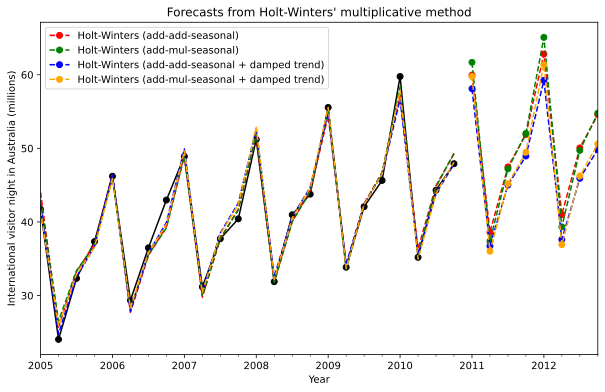

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


In [191]:
fit1 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit2 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit3 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit4 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()

results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)

ax = aust.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)

ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")

fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")
fit3.fittedvalues.plot(ax=ax, style="--", color="blue")
fit4.fittedvalues.plot(ax=ax, style="--", color="orange")

fit1.forecast(8).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
fit3.forecast(8).rename("Holt-Winters (add-add-seasonal + damped trend)").plot(
    ax=ax, style="--", marker="o", color="blue", legend=True
)
fit4.forecast(8).rename("Holt-Winters (add-mul-seasonal + damped trend)").plot(
    ax=ax, style="--", marker="o", color="orange", legend=True
)

plt.show();
print(
    "Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality."
)

# 5.2 Фреймворк Orbit

In [192]:
# !pip install orbit-ml -q

In [193]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# import orbit
# from orbit.utils.dataset import load_iclaims
# from orbit.models import ETS
# from orbit.diagnostics.plot import plot_predicted_data

In [194]:
# df = load_iclaims()
# date_col = 'week'
# response_col = 'claims'
# df.dtypes

In [195]:
# df.head(5)

In [196]:
# test_size = 52
# train_df = df[:-test_size]
# test_df = df[-test_size:]

In [197]:
# ets = ETS(
#     response_col=response_col,
#     date_col=date_col,
#     seasonality=52,
#     seed=8888,
# )

In [198]:
# %%time
# ets.fit(df=train_df)

In [199]:
# predicted_df = ets.predict(df=test_df)

In [200]:
# _ = plot_predicted_data(train_df, predicted_df, date_col, response_col, title='Prediction with ETS')

<!-- ## Модель DLT - Damped Local Trend

[Документация](https://orbit-ml.readthedocs.io/en/latest/tutorials/dlt.html) -->

<!-- 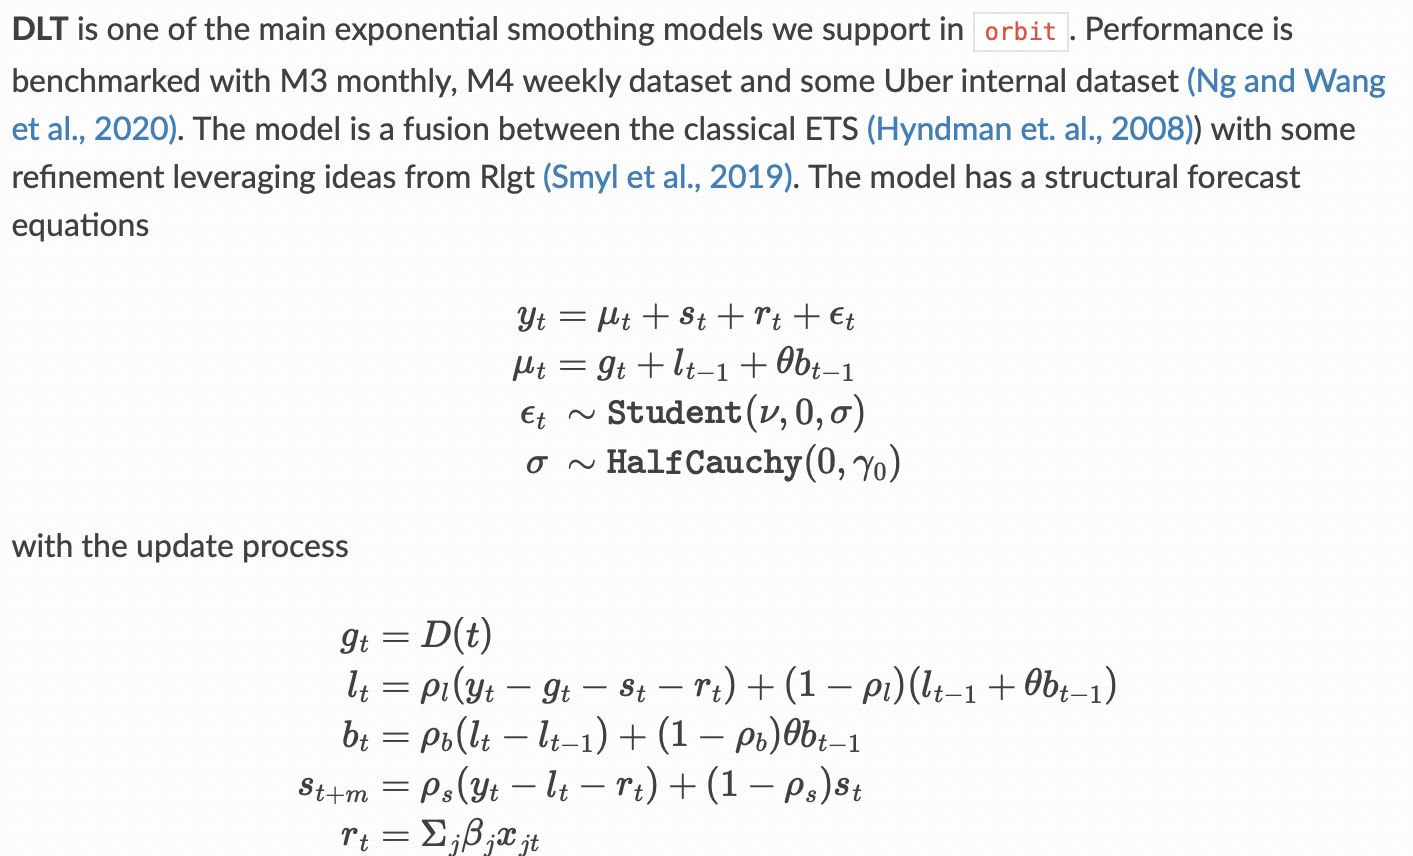 -->

In [201]:
# from orbit.models import DLT

# dlt = DLT(
#     response_col=response_col,
#     date_col=date_col,
#     estimator='stan-map',
#     seasonality=52,
#     seed=8888,
#     global_trend_option='linear',
#     # for prediction uncertainty
#     n_bootstrap_draws=1000,
# )

In [202]:
# %%time
# dlt.fit(df=train_df)

In [203]:
# predicted_dlt_df = dlt.predict(df=test_df)

# _ = plot_predicted_data(train_df, predicted_dlt_df, date_col, response_col, title='Prediction with DLT');

<!-- ## Модель LGT - Local Global Trend

[Документация](https://orbit-ml.readthedocs.io/en/latest/tutorials/lgt.html) -->

<!-- 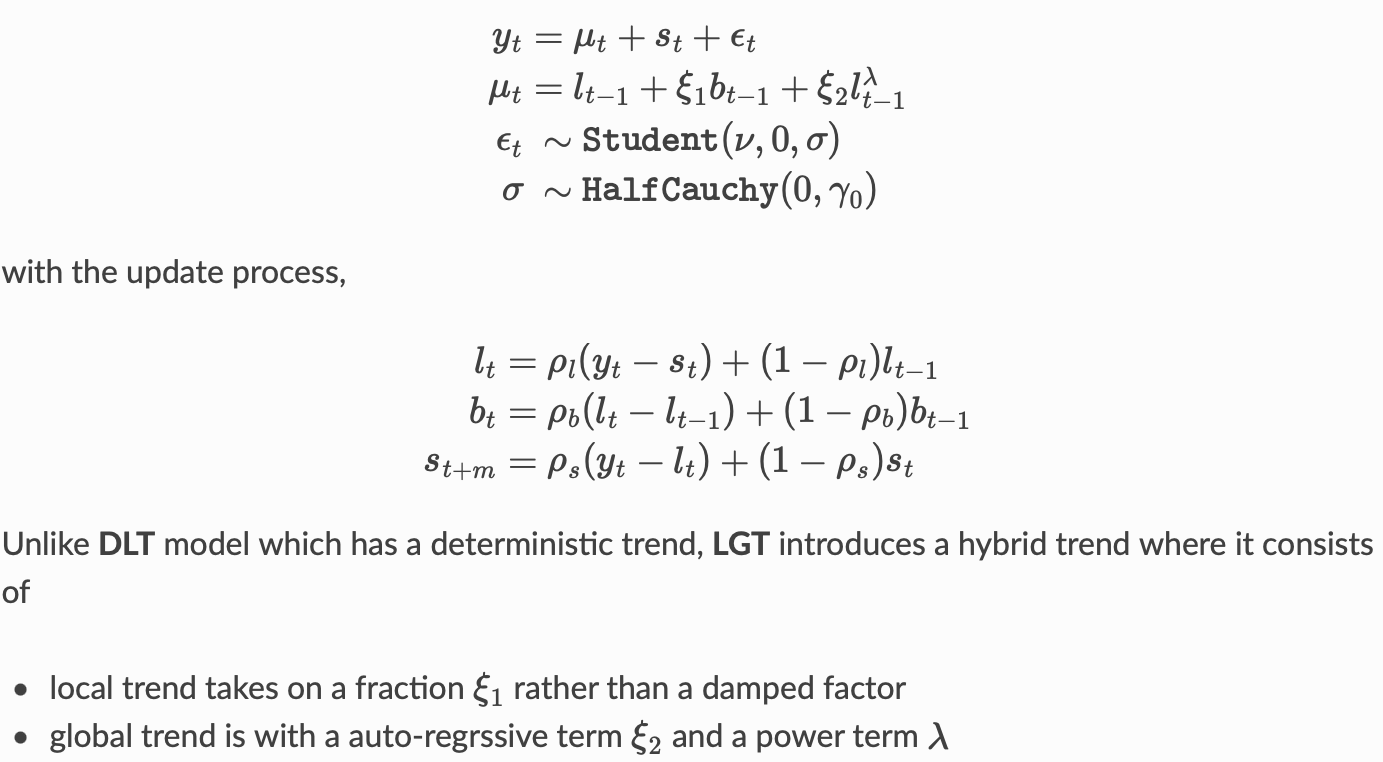 -->

In [204]:
# from orbit.models import LGT

# lgt = LGT(
#     response_col=response_col,
#     date_col=date_col,
#     estimator='stan-map',
#     seasonality=52,
#     seed=8888)

In [205]:
# %%time
# lgt.fit(df=train_df)

In [206]:
# predicted_lgt_df = lgt.predict(df=test_df)

# _ = plot_predicted_data(train_df, predicted_lgt_df, date_col, response_col, title='Prediction with LGT');

# 5.3 Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Импорт библиотек и загрузка данных

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("data/market_arrivals_ind.csv")

In [226]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [227]:
df.head()

market     month  year  quantity  priceMin  priceMax  \
date                                                                   
1996-01  LASALGAON(MS)   January  1996    225063       160       257   
1996-02  LASALGAON(MS)  February  1996    196164       133       229   
1996-03  LASALGAON(MS)     March  1996    178992       155       274   
1996-04  LASALGAON(MS)     April  1996    192592       136       279   
1996-05  LASALGAON(MS)       May  1996    237574       154       312   

         priceMod state       city       date  
date                                           
1996-01       226    MS  LASALGAON 1996-01-01  
1996-02       186    MS  LASALGAON 1996-02-01  
1996-03       243    MS  LASALGAON 1996-03-01  
1996-04       254    MS  LASALGAON 1996-04-01  
1996-05       269    MS  LASALGAON 1996-05-01

Оставим только данные по городу Бангалор

In [228]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [229]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [230]:
ts.head()

quantity
date             
2004-01    227832
2004-02    225133
2004-03    221952
2004-04    185150
2004-05    137390

In [231]:
ts.quantity.plot(figsize=(25,5));

## Обучение адаптивных моделей

Разбейте данные (quantity) на train и test.

* train - первые 85% данных

* test - следующие 15% данных

Проверьте, что в тест попало 22 измерения.

In [232]:
# ваш код здесь
split_index = int(0.85*len(ts))

Train = ts.iloc[:split_index]
Test = ts.iloc[split_index:]

# your code here
Train.shape, Test.shape

((124, 1), (22, 1))

Обучите следующие модели на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Простое экспоненциальное сглаживание с автоматически подбираемым $\alpha$

2) Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров

3) Аддитивную модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

СПРАВКА:
- по модели Хольта https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#The-Internals

- по прогнозированию https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html#Example

-

In [233]:
Train.head()

quantity
date             
2004-01    227832
2004-02    225133
2004-03    221952
2004-04    185150
2004-05    137390

In [234]:
# https://nextjournal.com/blog/plotting-pandas-prophet
# The Pandas ↔ Matplotlib converters must be manually registered with
#pd.plotting.register_matplotlib_converters()

### Простое экспоненциальное сглаживание с автоматически подбираемым $\alpha$

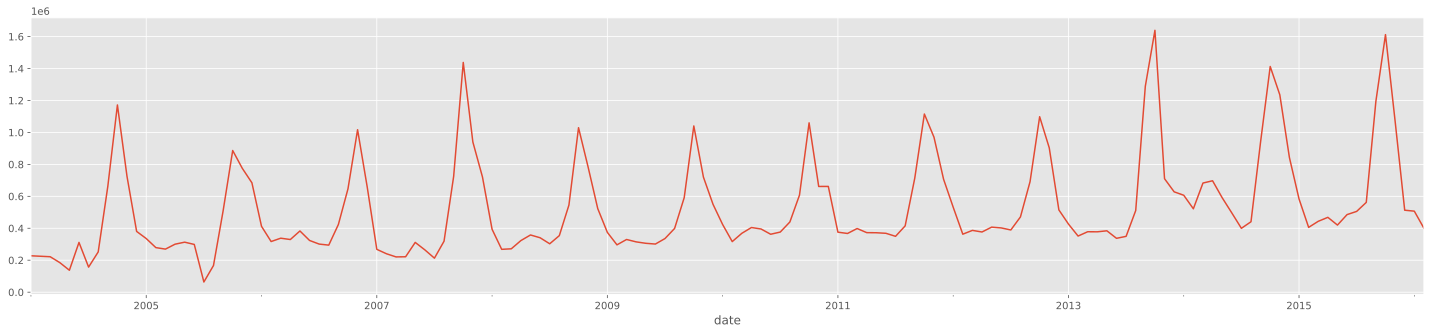

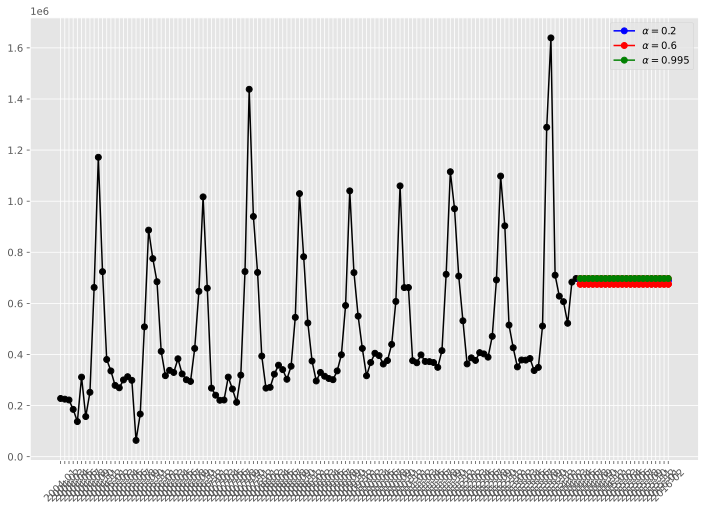

In [235]:
# ваш код здесь
fit1 = SimpleExpSmoothing(Train['quantity'], initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(22).rename(r"$\alpha=0.2$")
#fitvalues=fit1.fittedvalues

fit2 = SimpleExpSmoothing(Train['quantity'], initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(22).rename(r"$\alpha=0.6$")

fit3 = SimpleExpSmoothing(Train['quantity'], initialization_method="estimated").fit()
fcast3 = fit3.forecast(22).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])


#fitvalues.index=fitvalues.index.astype(str)
Train.index=Train.index.astype(str)
Test.index=Test.index.astype(str)
fcast1.index=pd.PeriodIndex(fcast1.index, freq="M").astype(str)
fcast2.index=pd.PeriodIndex(fcast2.index, freq="M").astype(str)
fcast3.index=pd.PeriodIndex(fcast3.index, freq="M").astype(str)

plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)

plt.plot(Train['quantity'], marker="o", color="black")
plt.plot(fcast1, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fcast2, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fcast3, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
plt.show();

### Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров

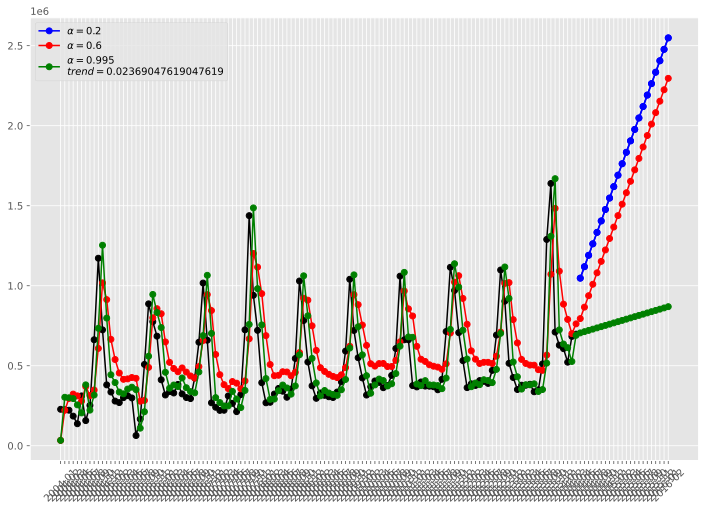

In [236]:
# ваш код здесь
fit1 = Holt(Train['quantity'], initialization_method="estimated").fit(
    smoothing_level=0.2, smoothing_trend=0, optimized=False
)

fcast1 = fit1.forecast(22).rename(r"$\alpha=0.2$")
#fitvalues=fit1.fittedvalues

fit2 = Holt(Train['quantity'], initialization_method="estimated").fit(
    smoothing_level=0.6, smoothing_trend=0, optimized=False
)
fcast2 = fit2.forecast(22).rename(r"$\alpha=0.6$")

fit3 = Holt(Train['quantity'], initialization_method="estimated").fit()
fcast3 = fit3.forecast(22).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"]+"\n" + r"$trend=%s$" % fit3.model.params["smoothing_trend"])



#fitvalues.index=fitvalues.index.astype(str)
Train.index=Train.index.astype(str)
Test.index=Test.index.astype(str)
fcast1.index=pd.PeriodIndex(fcast1.index, freq="M").astype(str)
fcast2.index=pd.PeriodIndex(fcast2.index, freq="M").astype(str)
fcast3.index=pd.PeriodIndex(fcast3.index, freq="M").astype(str)

plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)

plt.plot(Train['quantity'], marker="o", color="black")
plt.plot(fcast1, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
plt.show();

### Аддитивную модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

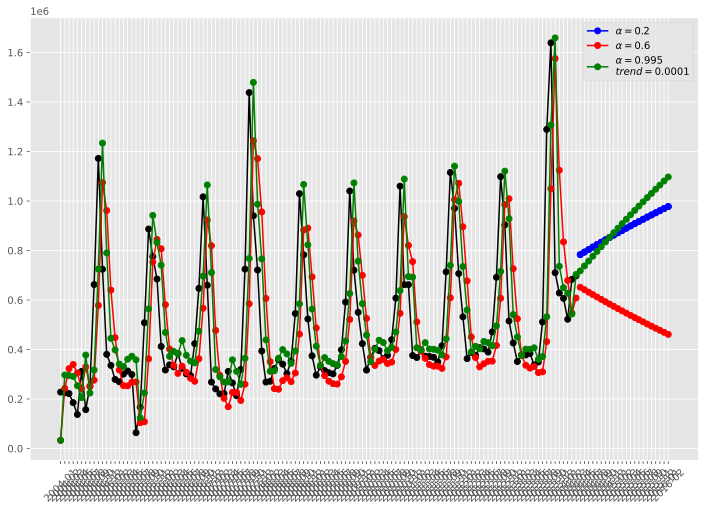

In [237]:
# ваш код здесь
fit1 = Holt(Train['quantity'], damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.2, smoothing_trend=0.2)

fcast1 = fit1.forecast(22).rename(r"$\alpha=0.2$")
#fitvalues=fit1.fittedvalues

fit2 = Holt(Train['quantity'], damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.6, smoothing_trend=0.2
)
fcast2 = fit2.forecast(22).rename(r"$\alpha=0.6$")

fit3 = Holt(Train['quantity'], damped_trend=True, initialization_method="estimated").fit()
fcast3 = fit3.forecast(22).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"]+"\n" + r"$trend=%s$" % fit3.model.params["smoothing_trend"])



#fitvalues.index=fitvalues.index.astype(str)
Train.index=Train.index.astype(str)
Test.index=Test.index.astype(str)
fcast1.index=pd.PeriodIndex(fcast1.index, freq="M").astype(str)
fcast2.index=pd.PeriodIndex(fcast2.index, freq="M").astype(str)
fcast3.index=pd.PeriodIndex(fcast3.index, freq="M").astype(str)

plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)

plt.plot(Train['quantity'], marker="o", color="black")
plt.plot(fcast1, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])
plt.show();

## Quiz: четыре модели Хольта-Винтерса

У какой из трех обученных моделей самый быстро возрастающий тренд?

Обучите четыре модели Хольта-Винтерса на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

3) Модель с аддитивными трендом и сезонностью и затухающим трендом

4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

In [238]:
Train.head()

quantity
date             
2004-01    227832
2004-02    225133
2004-03    221952
2004-04    185150
2004-05    137390

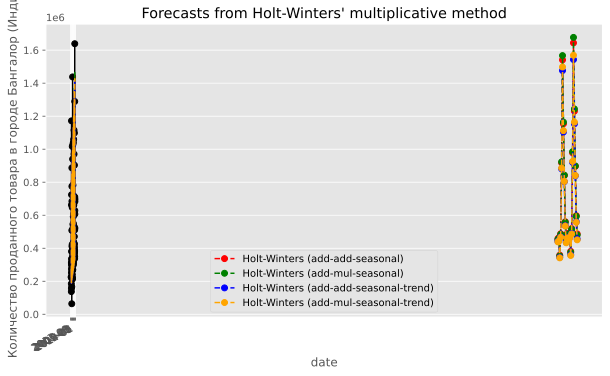

In [239]:
# ваш код здесь
fit1 = ExponentialSmoothing(
    Train['quantity'],
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit2 = ExponentialSmoothing(
    Train['quantity'],
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit3 = ExponentialSmoothing(
    Train['quantity'],
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fit4 = ExponentialSmoothing(
    Train['quantity'],
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()

results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)

ax = Train['quantity'].plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)

ax.set_ylabel("Количество проданного товара в городе Бангалор (Индия)")
ax.set_xlabel("Год")

fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")
fit3.fittedvalues.plot(ax=ax, style="--", color="blue")
fit4.fittedvalues.plot(ax=ax, style="--", color="orange")

fit1.forecast(22).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(22).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
fit3.forecast(22).rename("Holt-Winters (add-add-seasonal-trend)").plot(
    ax=ax, style="--", marker="o", color="blue", legend=True
)
fit4.forecast(22).rename("Holt-Winters (add-mul-seasonal-trend)").plot(
    ax=ax, style="--", marker="o", color="orange", legend=True
)

plt.show();

In [240]:
print(fit1.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 quantity   No. Observations:                  124
Model:             ExponentialSmoothing   SSE                  1763339023735.757
Optimized:                         True   AIC                           2930.866
Trend:                         Additive   BIC                           2975.990
Seasonal:                      Additive   AICC                          2937.380
Seasonal Periods:                    12   Date:                 Sat, 21 Jun 2025
Box-Cox:                           True   Time:                         20:22:53
Box-Cox Coeff.:                -0.02260                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              1.4918e-08                alpha                 True
smoothing_trend          

Вычислите RMSE (корень из среднеквадратичной ошибки) на тестовых данных для каждого из четырех прогнозов.

In [241]:
from sklearn.metrics import mean_squared_error

# ваш код здесь
preds1=fit1.forecast(22)
preds2=fit2.forecast(22)
preds3=fit3.forecast(22)
preds4=fit4.forecast(22)

print(round(mean_squared_error(Test, preds1)**0.5,0))
print(round(mean_squared_error(Test, preds2)**0.5,0))
print(round(mean_squared_error(Test, preds3)**0.5,0))
print(round(mean_squared_error(Test, preds4)**0.5,0))

118557.0
120857.0
113917.0
113897.0


## Quiz: выбор лучшей из четырех моделей

Какая модель справилась лучше остальных?

## Quiz: RMSE для лучшей модели

Чему равно значение RMSE для лучшей модели? Ответ округлите до целого числа.

В предыдущем домашнем задании мы работали с логарифмированным рядом и вычисляли RMSE для него.

Вычислите ошибки последних четырех моделей для логарифмов правильных ответов и прогнозов.

In [242]:
# ваш код здесь

## Quiz: SARIMAX или модели Хольта-Винтерса

Какое семейство моделей лучше справилось с решением задачи:
SARIMAX или модели Хольта-Винтерса?

In [243]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [244]:
# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("data/market_arrivals_ind.csv")

In [245]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

df.head()

market     month  year  quantity  priceMin  priceMax  \
date                                                                   
1996-01  LASALGAON(MS)   January  1996    225063       160       257   
1996-02  LASALGAON(MS)  February  1996    196164       133       229   
1996-03  LASALGAON(MS)     March  1996    178992       155       274   
1996-04  LASALGAON(MS)     April  1996    192592       136       279   
1996-05  LASALGAON(MS)       May  1996    237574       154       312   

         priceMod state       city       date  
date                                           
1996-01       226    MS  LASALGAON 1996-01-01  
1996-02       186    MS  LASALGAON 1996-02-01  
1996-03       243    MS  LASALGAON 1996-03-01  
1996-04       254    MS  LASALGAON 1996-04-01  
1996-05       269    MS  LASALGAON 1996-05-01

In [246]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [247]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [248]:
ts.head()

quantity
date             
2004-01    227832
2004-02    225133
2004-03    221952
2004-04    185150
2004-05    137390

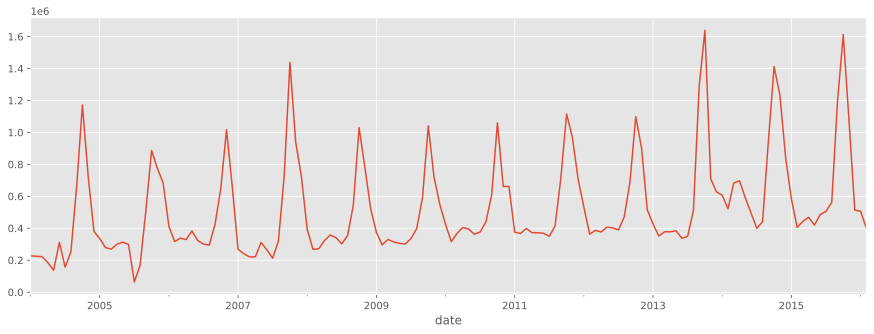

In [249]:
endog = ts['quantity']
endog.plot(figsize=(15, 5))
plt.show();

In [250]:
# Construct the model
mod = sm.tsa.SARIMAX(endog, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                  146
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2005.537
Date:                Sat, 21 Jun 2025   AIC                           4017.074
Time:                        20:22:54   BIC                           4026.025
Sample:                    01-31-2004   HQIC                          4020.711
                         - 02-29-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.743e+05   4.33e+04      4.024      0.000    8.94e+04    2.59e+05
ar.L1          0.6654      0.054     12.334      0.000       0.560       0.771
sigma2       4.98e+10      0.208   2.39e+11      0.0

In [251]:
# The default is to get a one-step-ahead forecast:
print(res.forecast())

2016-03   440652.73
Freq: M, dtype: float64


In [252]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast()

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

quantity      mean   mean_se  mean_ci_lower  mean_ci_upper
2016-03  440652.73 223164.74       73579.41      807726.06


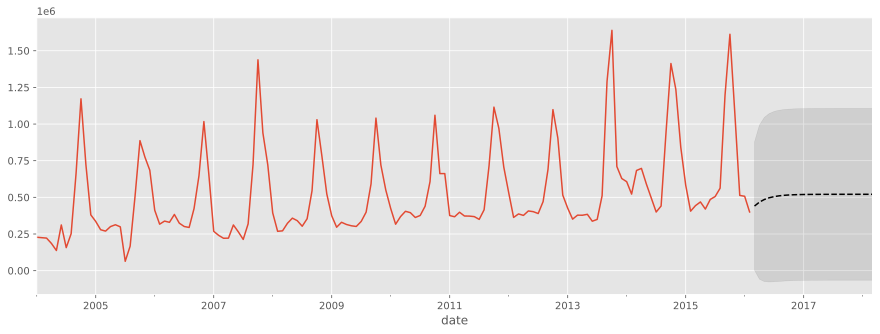

In [253]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
endog.loc['2004':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast('2018-03').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)
plt.show();


In [254]:
# Step 1: fit model parameters w/ training sample
training_obs = int(len(endog) * 0.8)

training_endog = endog[:training_obs]
training_mod = sm.tsa.SARIMAX(
    training_endog, order=(1, 0, 0), trend='c')
training_res = training_mod.fit()

# Print the estimated parameters
print(training_res.params)


intercept        164199.24
ar.L1                 0.65
sigma2      36148347870.75
dtype: float64


In [255]:
# Step 2: produce one-step-ahead forecasts
fcast = training_res.forecast()

# Step 3: compute root mean square forecasting error
true = endog.reindex(fcast.index)
error = true - fcast

# Print out the results
print(pd.concat([true.rename('true'),
                 fcast.rename('forecast'),
                 error.rename('error')], axis=1))


            true  forecast     error
2013-09  1289187 495279.37 793907.63


In [256]:
# Setup forecasts
nforecasts = 22
forecasts = {}

# Get the number of initial training observations
nobs = len(endog)
n_init_training = int(nobs * 0.8)

# Create model for initial training sample, fit parameters
init_training_endog = endog.iloc[:n_init_training]
mod = sm.tsa.SARIMAX(training_endog, order=(1, 0, 0), trend='c')
res = mod.fit()

# Save initial forecast
forecasts[training_endog.index[-1]] = res.forecast(steps=nforecasts)

# Step through the rest of the sample
for t in range(n_init_training, nobs):
    # Update the results by appending the next observation
    updated_endog = endog.iloc[t:t+1]
    res = res.append(updated_endog, refit=False)

    # Save the new set of forecasts
    forecasts[updated_endog.index[0]] = res.forecast(steps=nforecasts)

# Combine all forecasts into a dataframe
forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:5, :5])


          2013-08   2013-09    2013-10   2013-11   2013-12
2013-09 495279.37       NaN        NaN       NaN       NaN
2013-10 484984.65 999187.33        NaN       NaN       NaN
2013-11 478316.90 811358.67 1225776.97       NaN       NaN
2013-12 473998.30 689704.72  958117.56 624228.43       NaN
2014-01 471201.20 610911.18  784758.36 568503.12 571088.40


In [257]:
# Construct the forecast errors
forecast_errors = forecasts.apply(lambda column: endog - column).reindex(forecasts.index)

print(forecast_errors.iloc[:5, :5])


           2013-08    2013-09    2013-10  2013-11  2013-12
2013-09  793907.63        NaN        NaN      NaN      NaN
2013-10 1154047.35  639844.67        NaN      NaN      NaN
2013-11  231949.10 -101092.67 -515510.97      NaN      NaN
2013-12  154221.70  -61484.72 -329897.56  3991.57      NaN
2014-01  135508.80   -4201.18 -178048.36 38206.88 35621.60


In [258]:
# Reindex the forecasts by horizon rather than by date
def flatten(column):
    return column.dropna().reset_index(drop=True)

flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')

print(flattened.iloc[:3, :5])

           2013-08    2013-09    2013-10   2013-11   2013-12
horizon                                                     
1        793907.63  639844.67 -515510.97   3991.57  35621.60
2       1154047.35 -101092.67 -329897.56  38206.88 -11953.08
3        231949.10  -61484.72 -178048.36 -10278.63 173117.45


In [259]:
# Compute the root mean square error
rmse = (flattened**2).mean(axis=1)**0.5

print(round(rmse.mean(),0))

428931.0


## Опциональное задание (без проверки)

Воспользуйтесь экспоненциальными моделями из библиотеки Orbit для получения прогноза в данной задаче.

In [260]:
# ваш код здесь